# Titanic - Machine Learning from Disaster

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Description of what each column in the Titanic dataset represents:

* PassengerId: Unique ID for each passenger.
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger.
* Age: Age of the passenger.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Ticket: Ticket number.
* Fare: Fare paid for the ticket.
* Cabin: Cabin number.
* Embarked: Port of embarkation 

In [1]:
# Fundamental libraries for numerical operations and data manipulation
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To handle various metrics for model evaluation
import sklearn.metrics as metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    make_scorer,
)


# For splitting the data, cross-validation, and model tuning
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV,
)

# To handle model-related exceptions
from sklearn.exceptions import NotFittedError

# For data preprocessing, scaling, and encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures

# To create machine learning pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer

# For feature selection
from sklearn.feature_selection import SelectFromModel, RFE

# For dimensionality reduction
from sklearn.decomposition import PCA

# For various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    HistGradientBoostingClassifier,
    ExtraTreesClassifier,
    StackingClassifier,
)
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# To handle imbalanced datasets
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For imputing missing values
from sklearn.impute import SimpleImputer

# To save and load models
import joblib

# For hyperparameter optimization
import optuna

# To shuffle data
from sklearn.utils import shuffle

# To display dataframes neatly in Jupyter notebooks
from IPython.display import display

# For statistical distributions
from scipy.stats import randint, uniform

# To handle warnings
import warnings
warnings.filterwarnings("ignore")

# For file system operations
import os

# Example code to list files in a directory (specific to Kaggle environment)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Uncomment to set pandas display options
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment to load a Jupyter extension for auto-formatting code
# %load_ext nb_black

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading the dataset and overview

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
display(pd.concat([train_data.head(), train_data.tail()]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
display(pd.concat([test_data.head(), test_data.tail()]))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


* Both datasets have the same columns apart of the one for prediction - Survived
* Looks like there might be some issues with the data within the column Ticket in the train dataset

In [4]:
# Copy of the training data
df = train_data.copy()

In [5]:
# Copy of the test data
df_test = test_data.copy()

In [6]:
# checking overall info - types of the columns for the dataset (train data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# checking overall info - types of the columns for the dataset (test data)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* There are five categorical columns and there are a lot of missing values in the Cabin column

In [8]:
# count the frequency of each value in the column Survived (train)
value_couts_survived = df['Survived'].value_counts()

# display the result
print(value_couts_survived)

Survived
0    549
1    342
Name: count, dtype: int64


* There is not big difference between both classes of the targeet variable  

In [9]:
# checking for missing values (tain)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# checking for missing values (test)
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# checking for duplicates (train)
df.duplicated().sum()

0

In [12]:
# checking for duplicates (test)
df_test.duplicated().sum()

0

* There are no duplicates

In [13]:
# categorical unique value check, numerical parameters overview (train)
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


* The mean Age of the passagers was 28 years
* Embarked has 3 unique values
* Pclass mean value is the same as the mx value

In [14]:
df.Name.head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

* The names have a title

## Exploratory Data Analysis

* Functions for quick visualization 

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="brown"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(20, 8))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

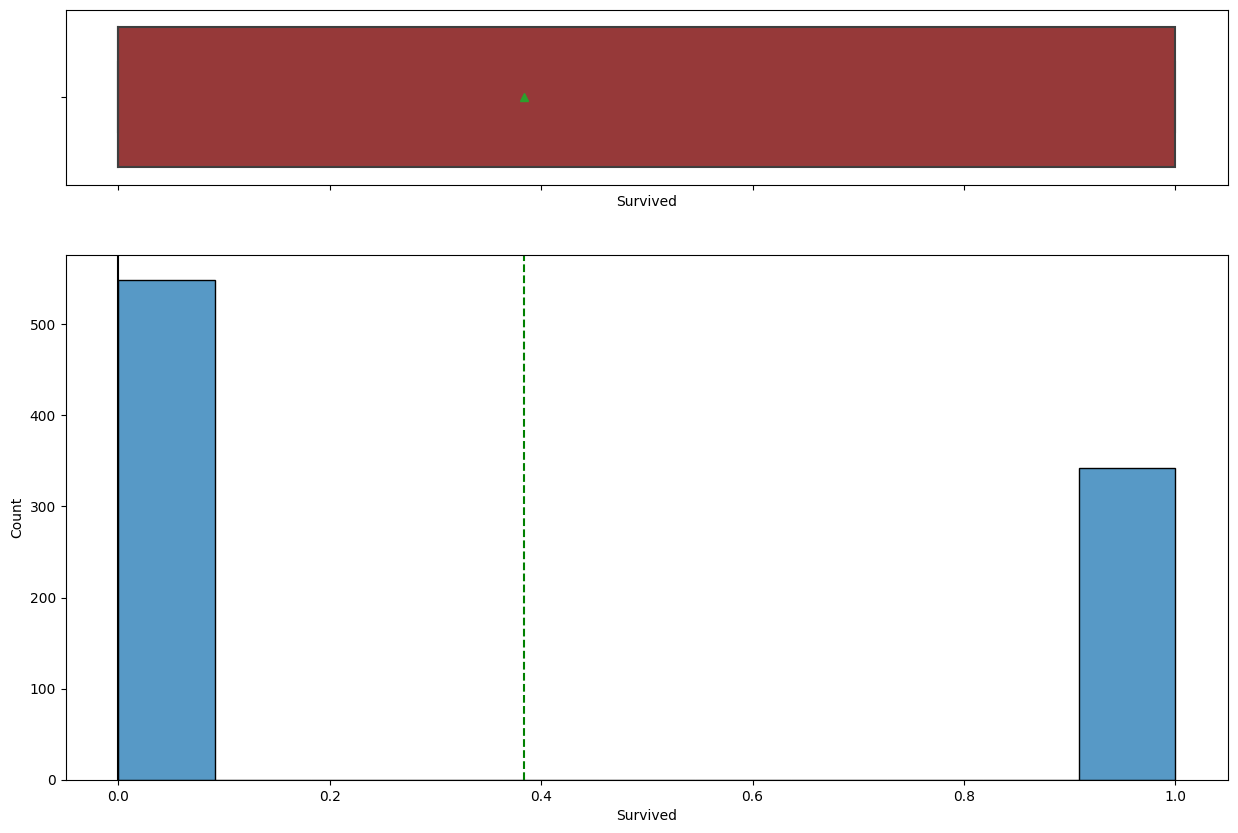

In [19]:
histogram_boxplot(df, "Survived")

* Most people didn't survived

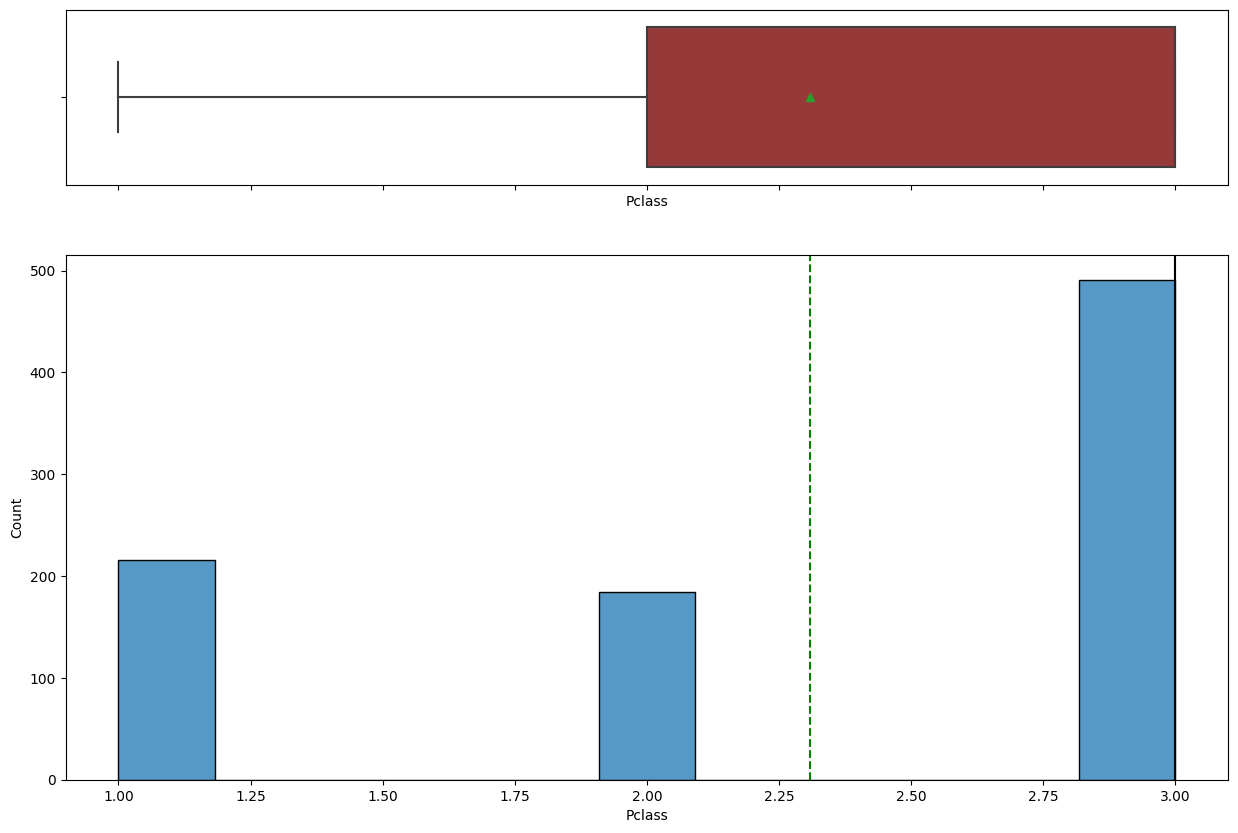

In [20]:
histogram_boxplot(df, "Pclass")

* The 3rd class of passengers is about twice as more than the rest

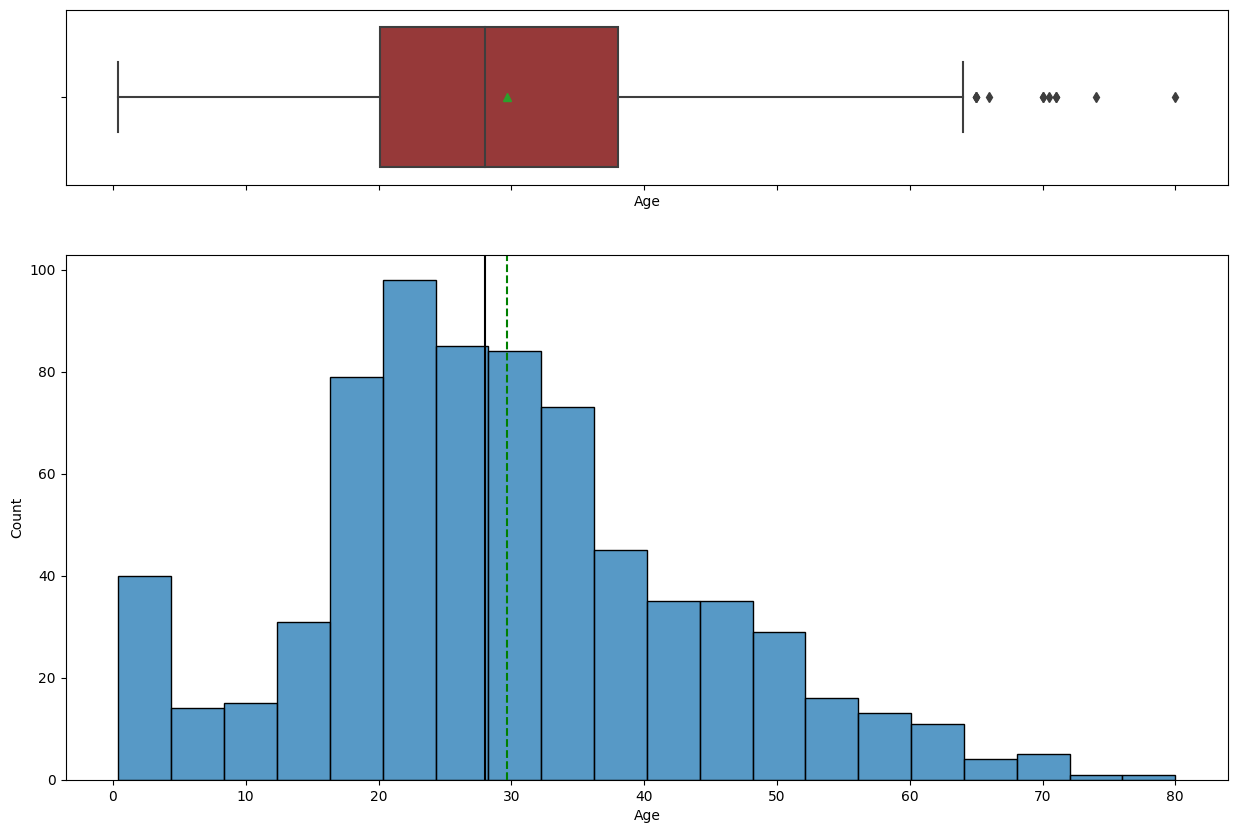

In [21]:
histogram_boxplot(df, "Age")

* The distribution of the Age is close to normal

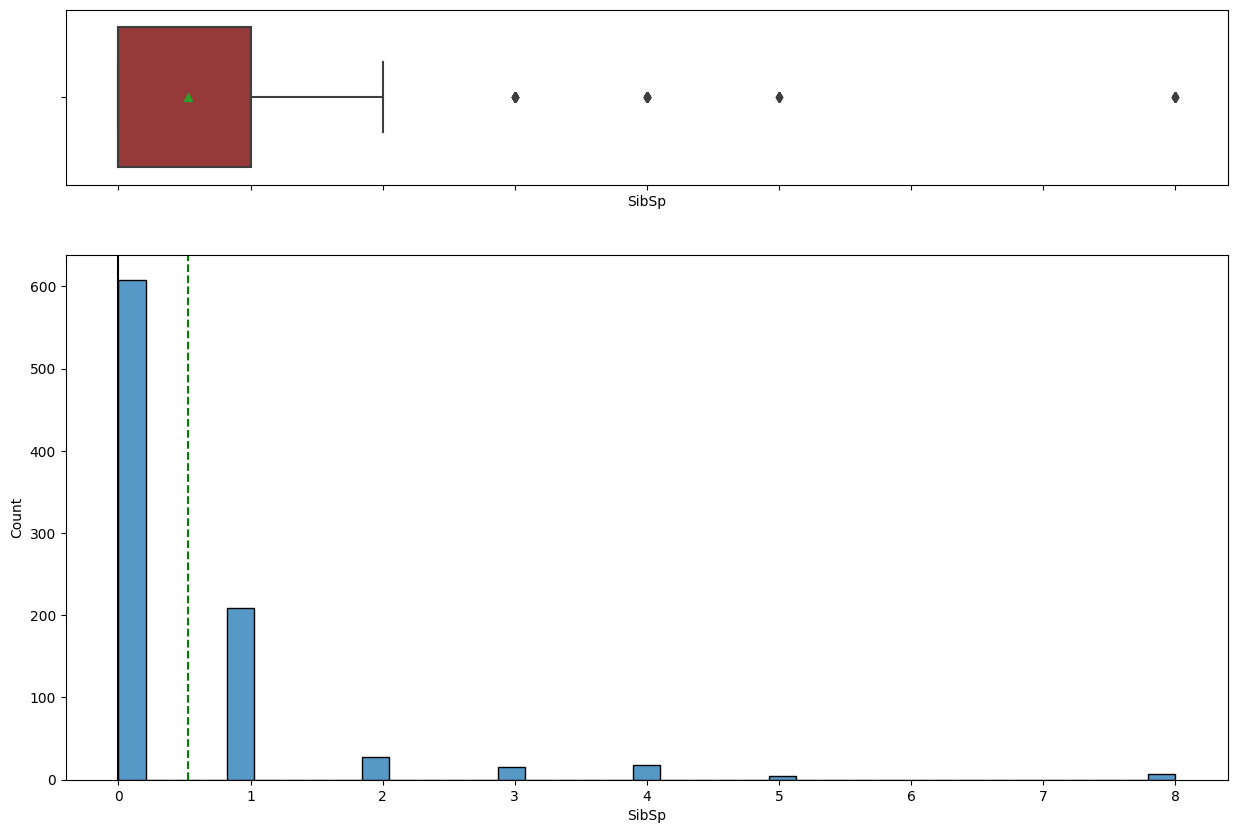

In [22]:
histogram_boxplot(df, "SibSp")

* The most common value on the SibSp is zero followed by one

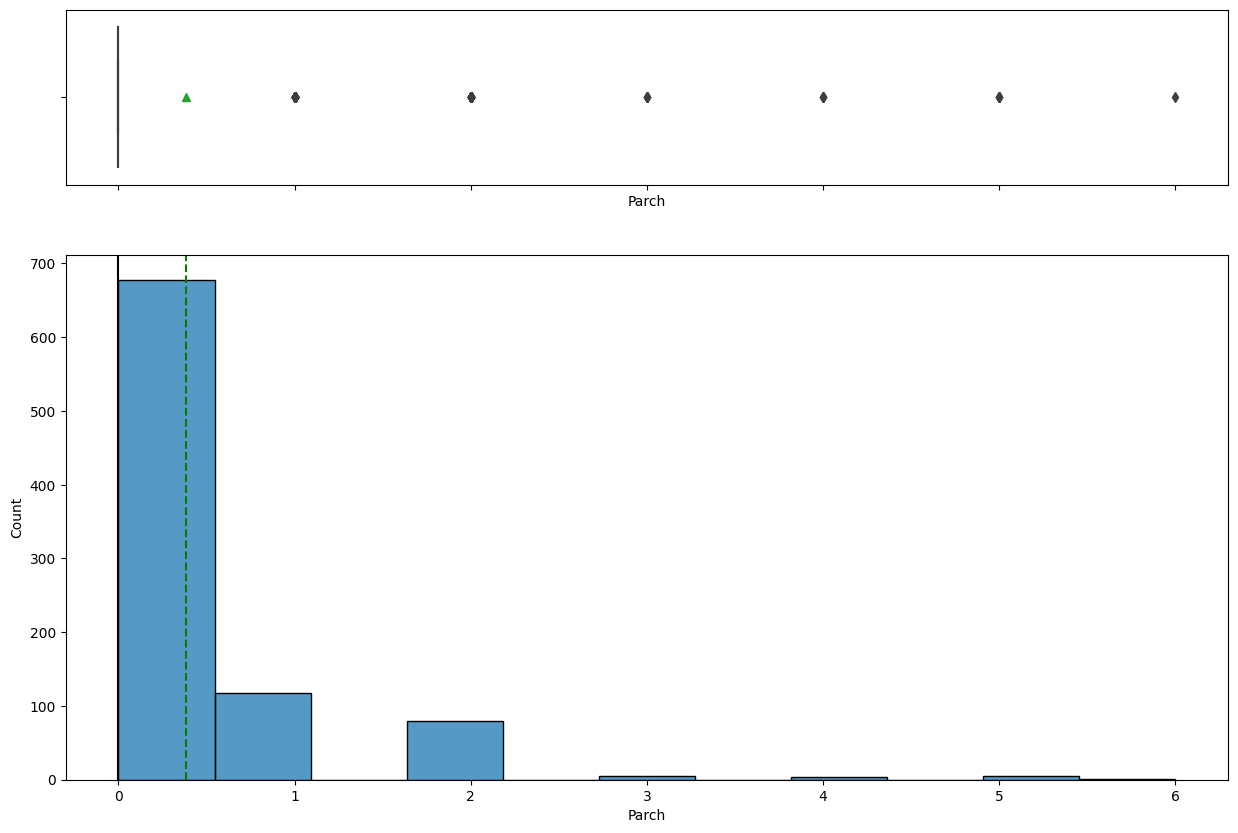

In [23]:
histogram_boxplot(df, "Parch")

* Parch count with zero is also the highest. There were about 200 with one and two (parents/children)

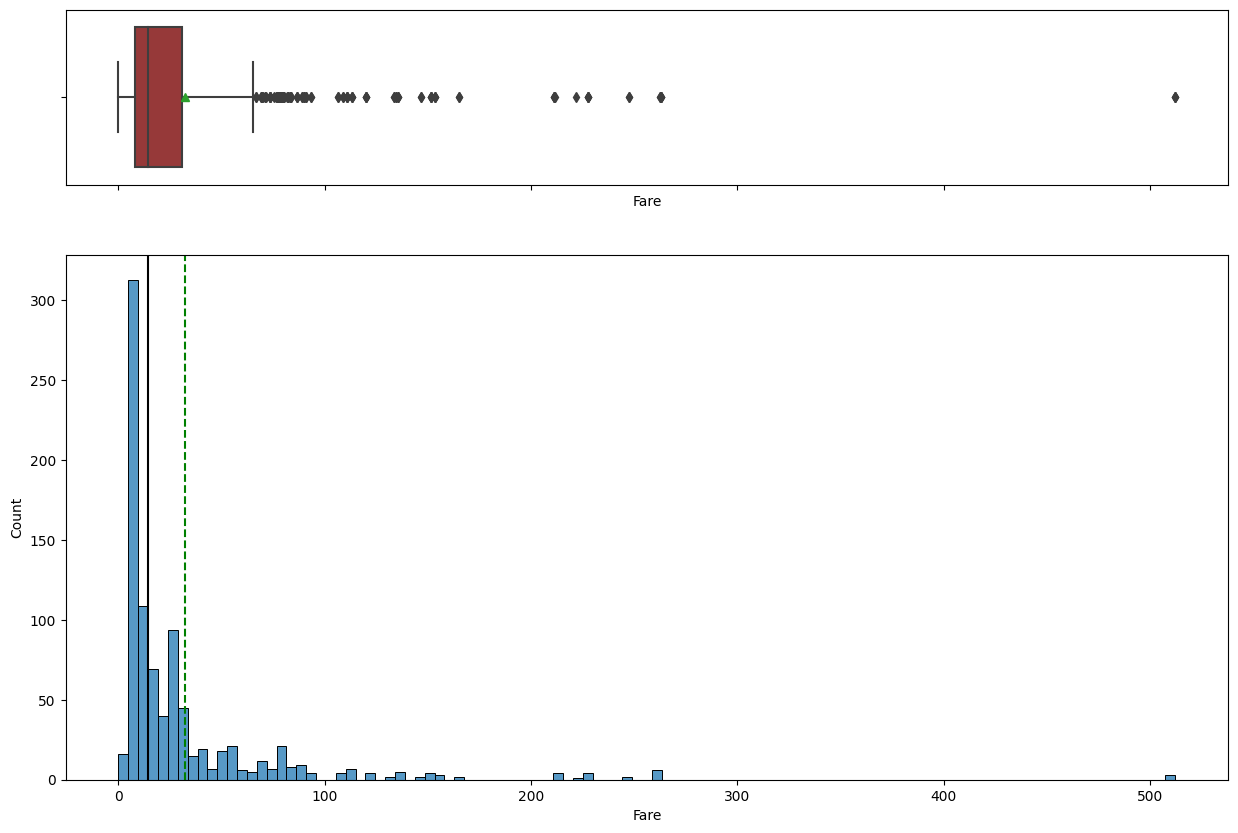

In [24]:
histogram_boxplot(df, "Fare")

* right skewed distribution for the Fare (most tickets were cheap)

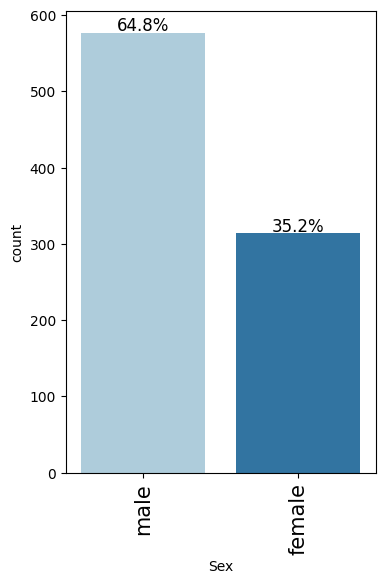

In [25]:
labeled_barplot(df, "Sex", perc=True)

* There were almsost twice as many men than women on the ship

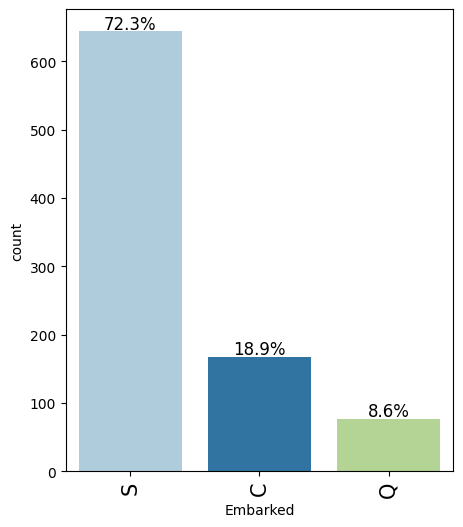

In [26]:
labeled_barplot(df, "Embarked", perc=True)

* Most people boarded from embark S

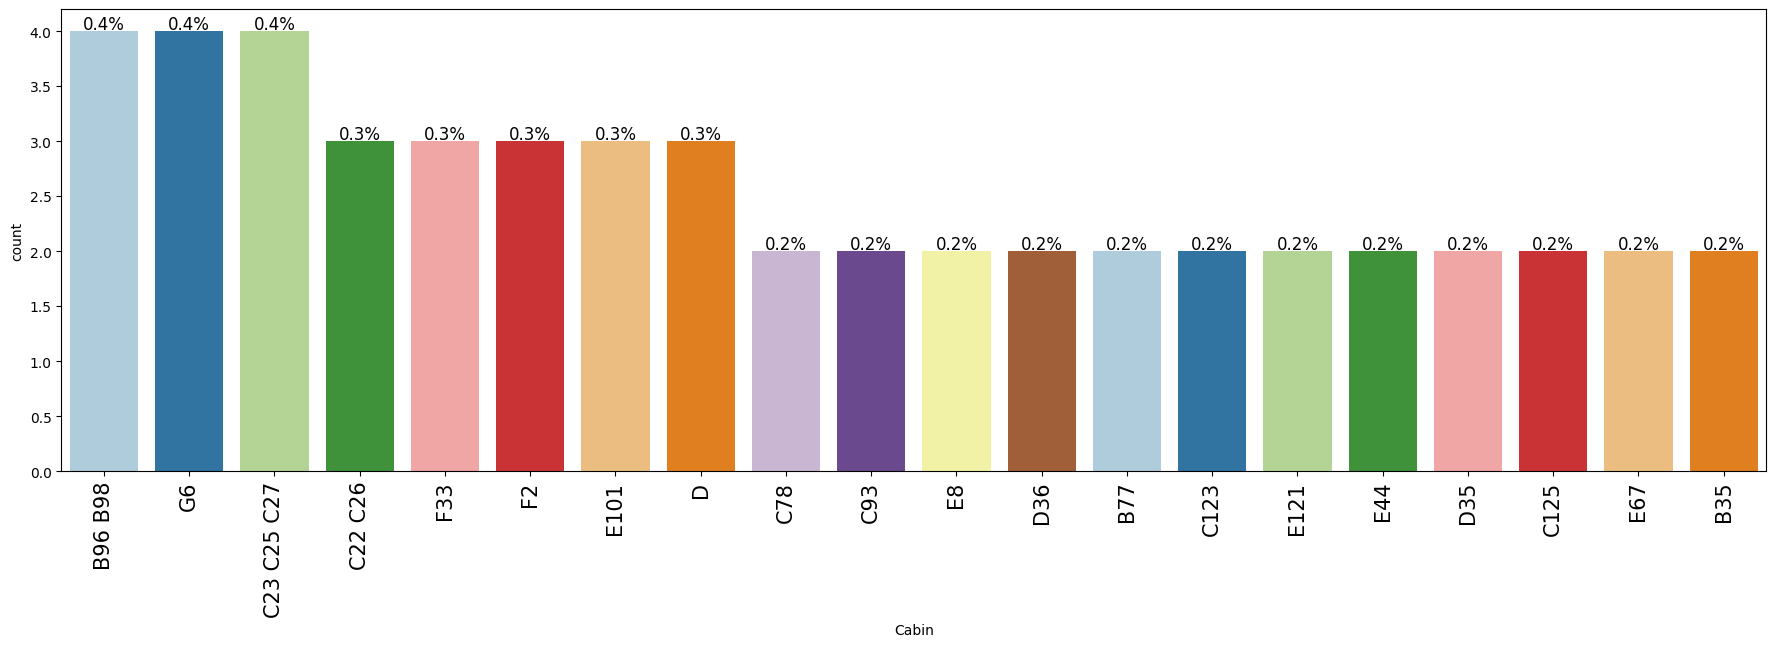

In [27]:
labeled_barplot(df, "Cabin", perc=True, n=20)

* Number of the cabins with the same name can be from 1 to 4

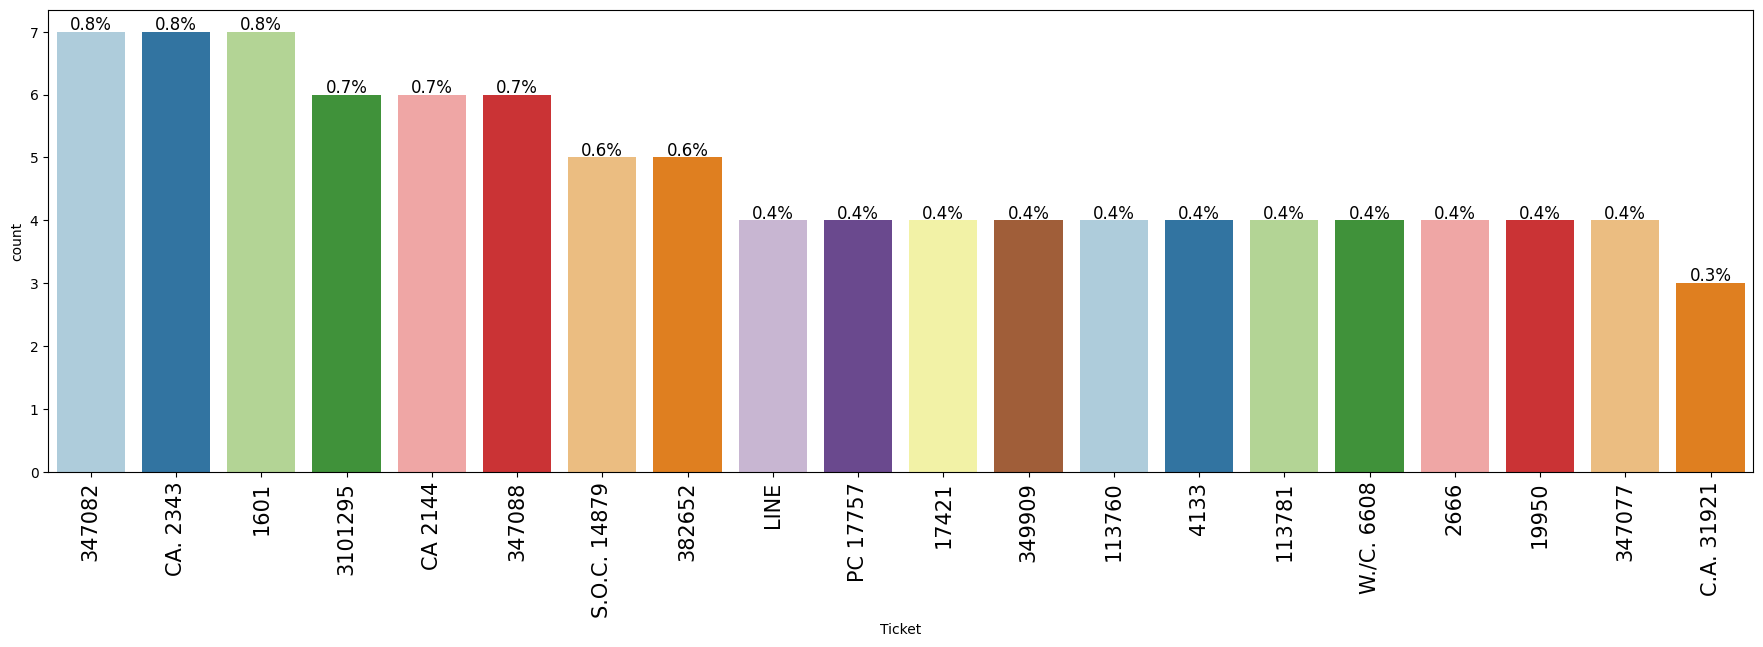

In [28]:
labeled_barplot(df, "Ticket", perc=True, n=20)

* Some tickets have only numerical values

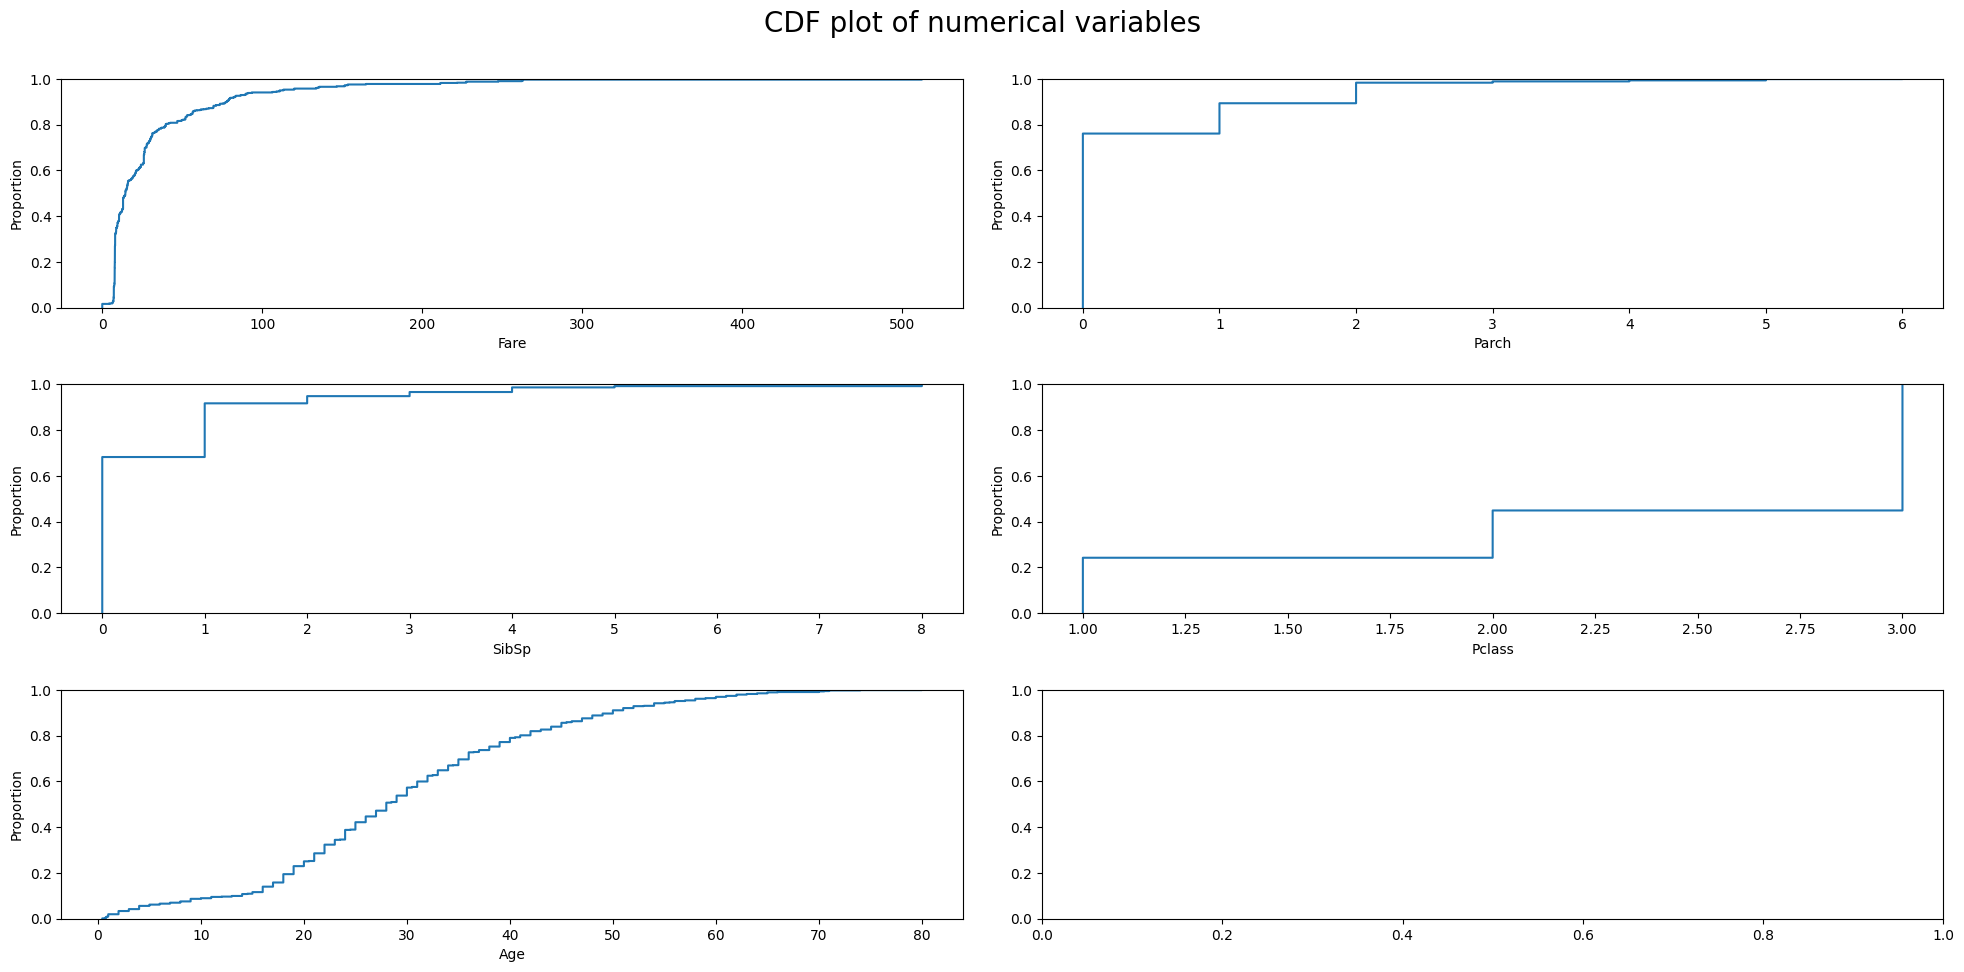

In [29]:
num_col = ['Fare', 'Parch', 'SibSp', 'Pclass', 'Age', 'Survived']
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

### Bivariate Analysis

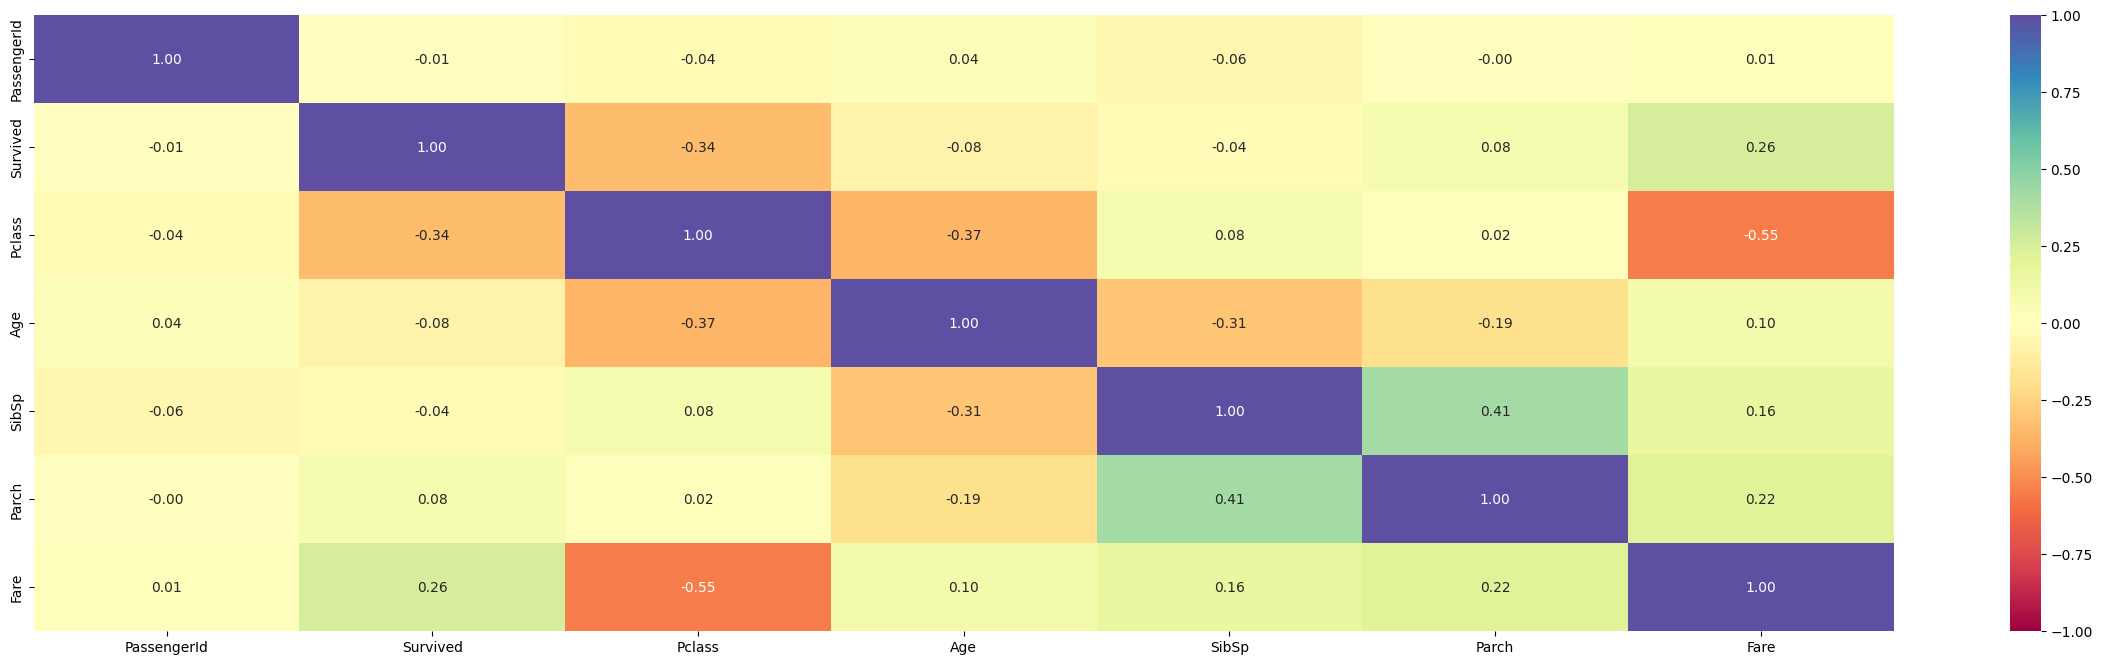

In [30]:
# correlation check
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
plt.figure(figsize=(30, 8))
sns.heatmap(
    numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is some negative correlation between Pclass and Fare

Embarked    C   Q    S  All
Sex                        
All       168  77  644  889
male       95  41  441  577
female     73  36  203  312
------------------------------------------------------------------------------------------------------------------------


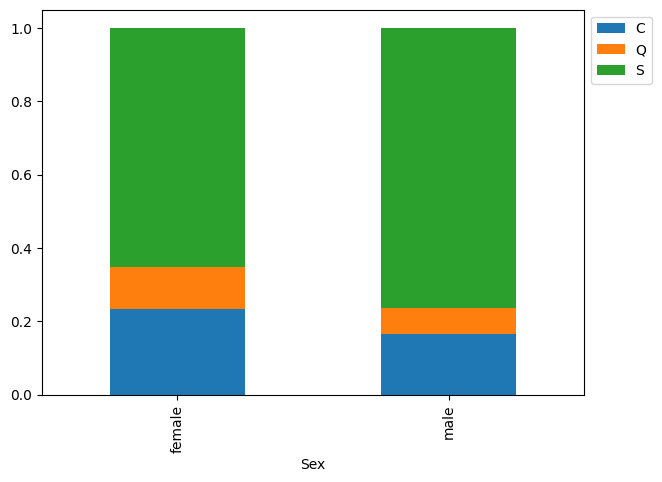

In [31]:
stacked_barplot(df, "Sex", "Embarked")

* Big difference between men and women only for the one who boarded from S (men were far more)

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


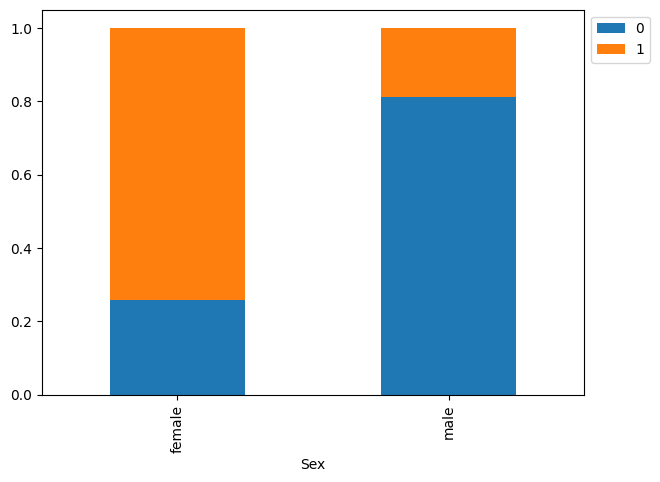

In [32]:
stacked_barplot(df, "Sex", "Survived")

* It looks that more female survived than men

Survived    0    1  All
Embarked               
All       549  340  889
S         427  217  644
C          75   93  168
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


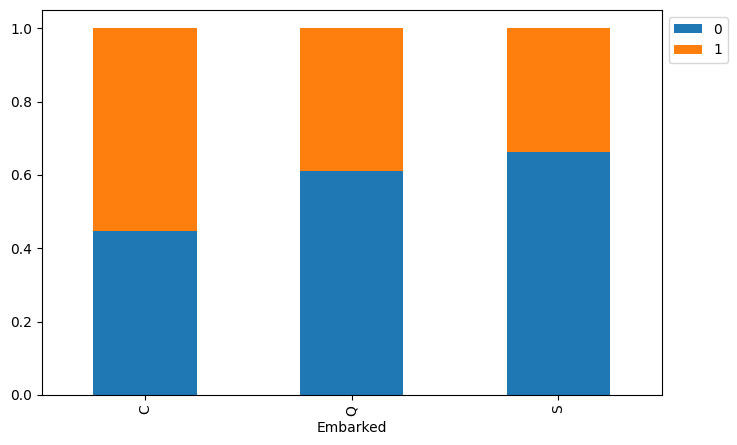

In [33]:
stacked_barplot(df, "Embarked", "Survived")

* Most people that came from C survived

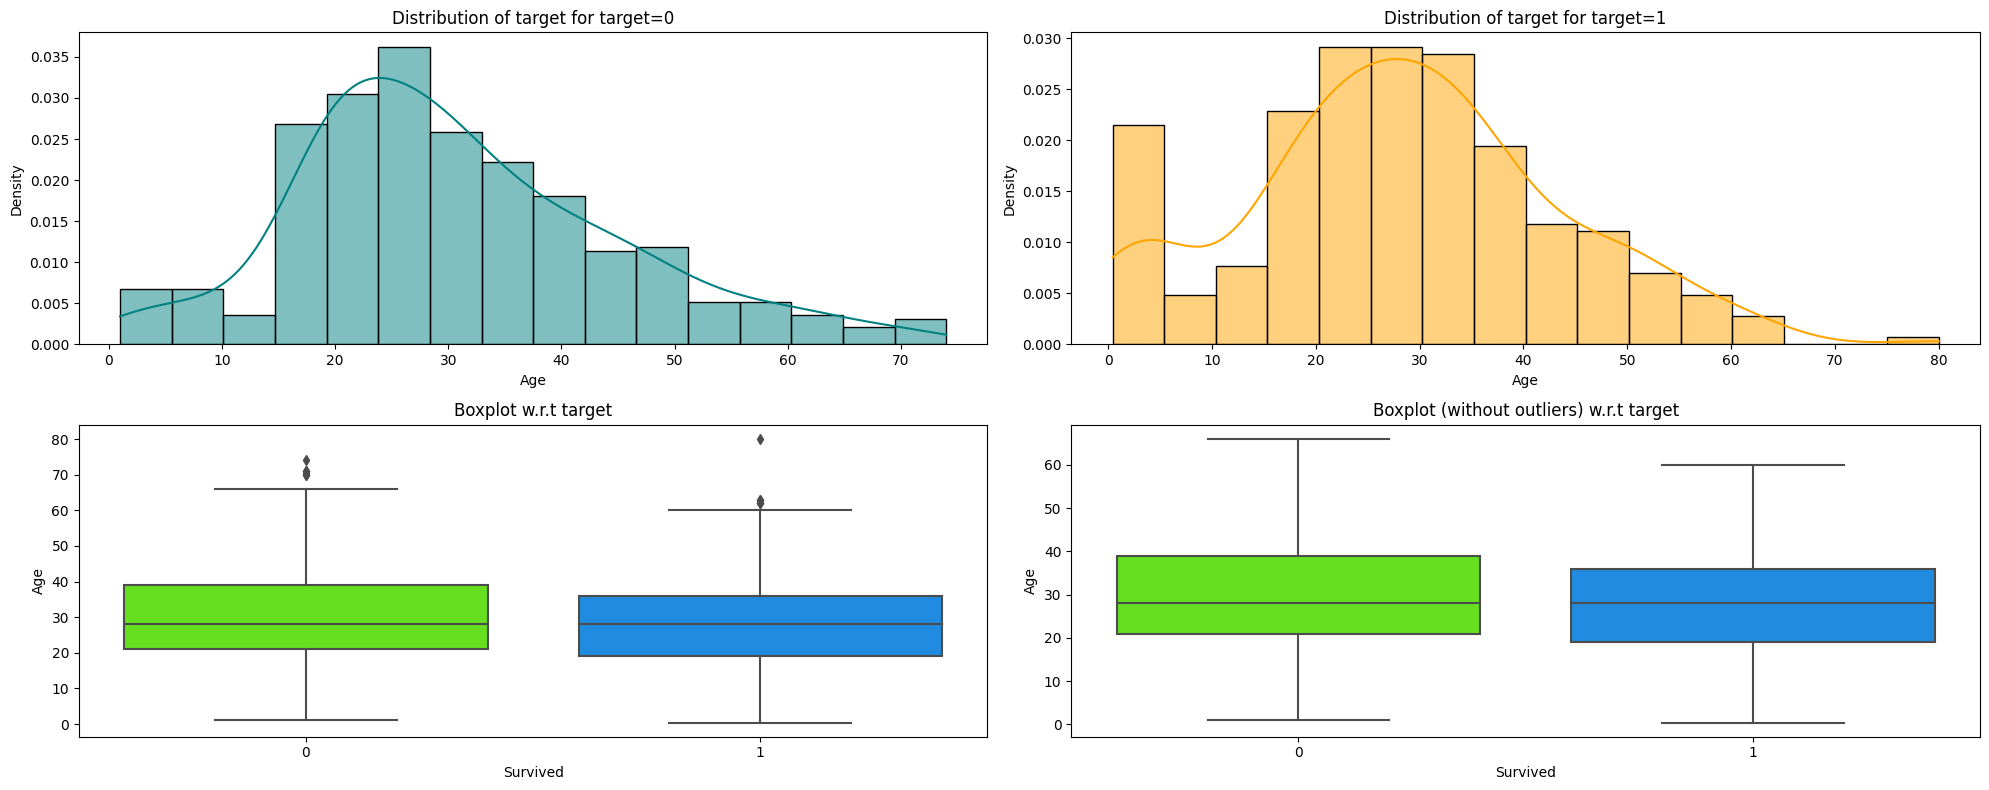

In [34]:
distribution_plot_wrt_target(df, "Age", "Survived")

* Most of the survived were young people

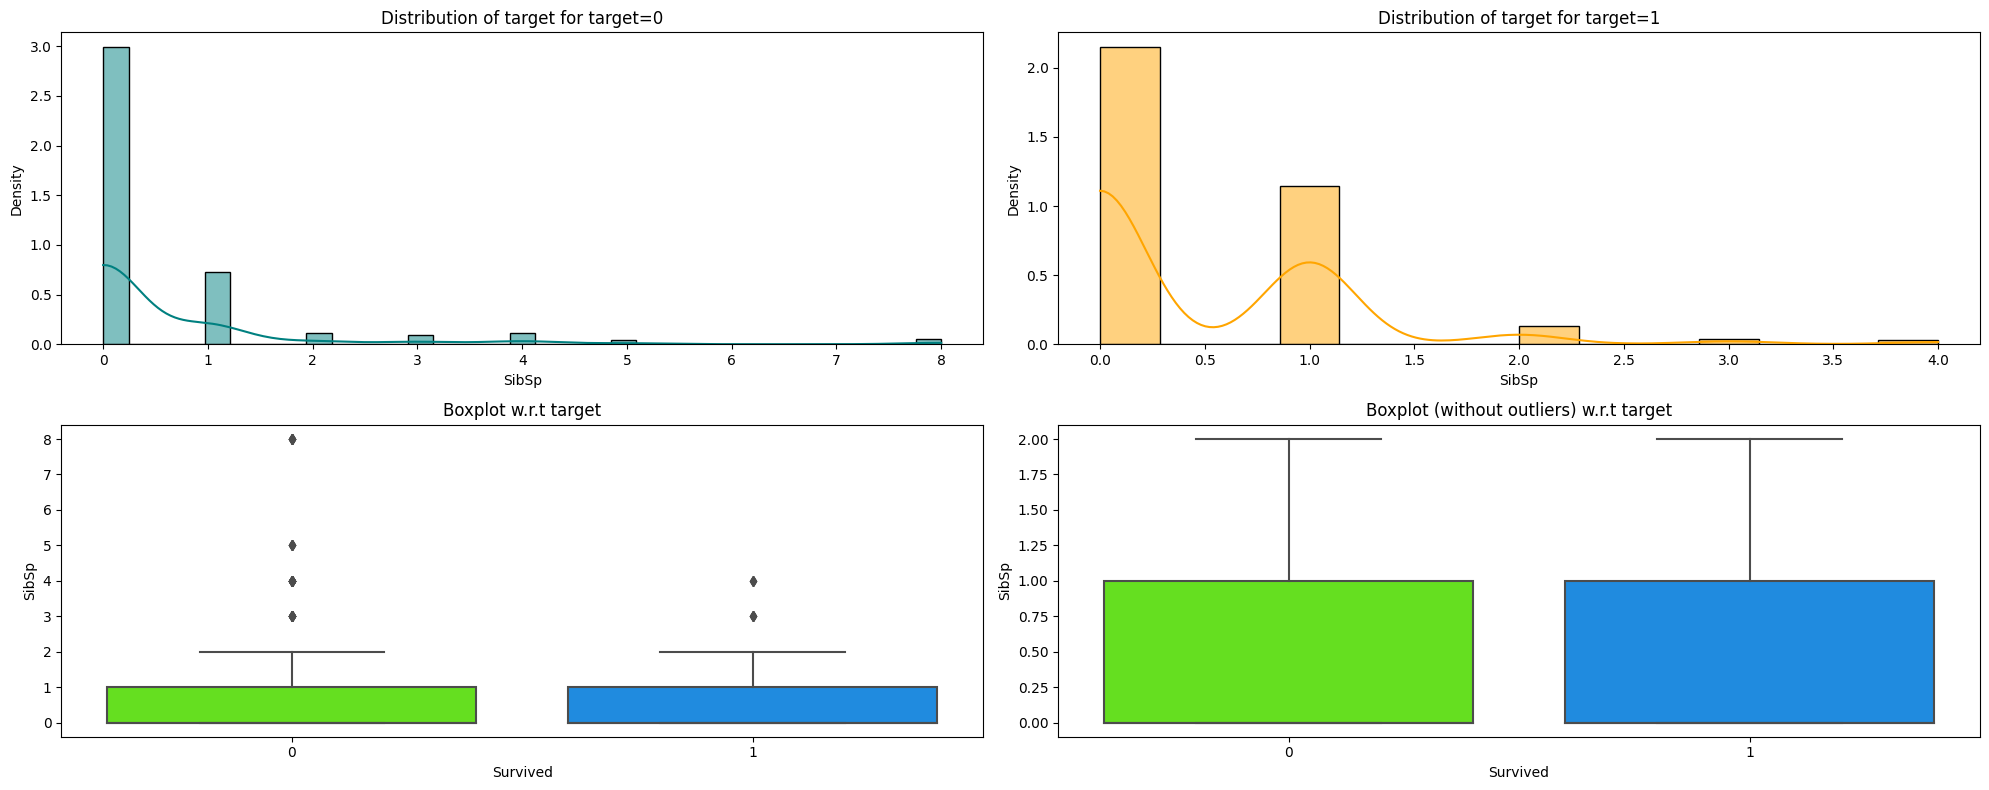

In [35]:
distribution_plot_wrt_target(df, "SibSp", "Survived")

* looks like SibSp wasn't much of a factor in regards to survived

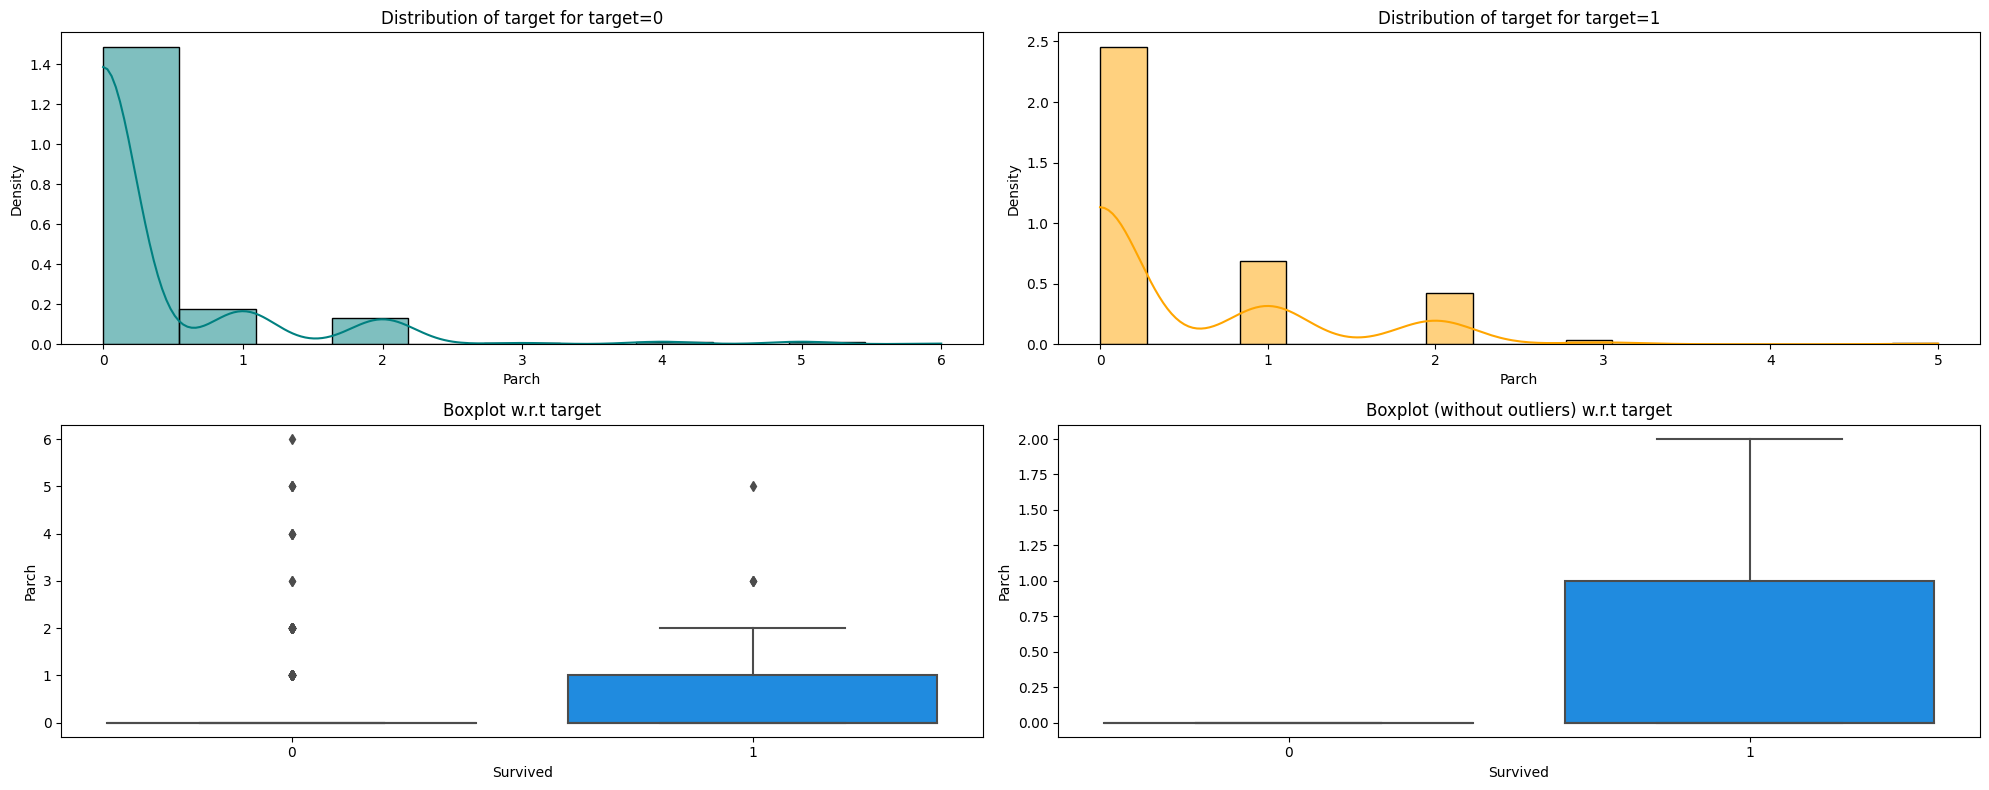

In [36]:
distribution_plot_wrt_target(df, "Parch", "Survived")

* Parents and children had a higher chance to survive

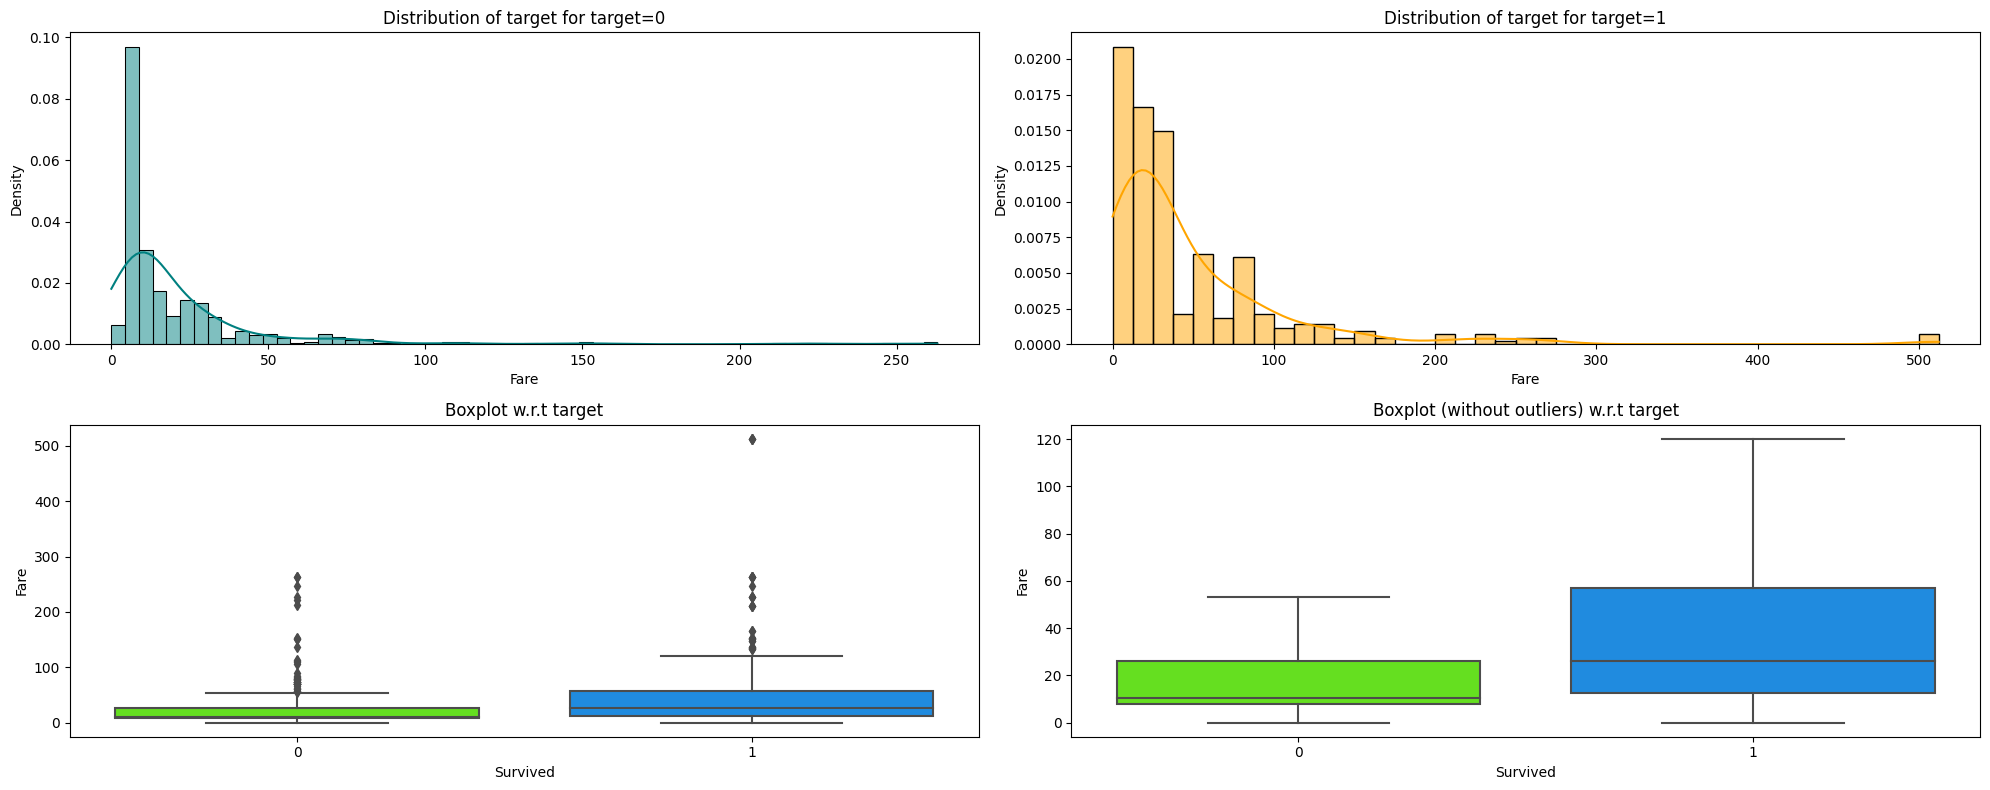

In [37]:
distribution_plot_wrt_target(df, "Fare", "Survived")

* Looks like the passengers with more expensive tickets survived

## Data Preprocessing

### Outlier Detection

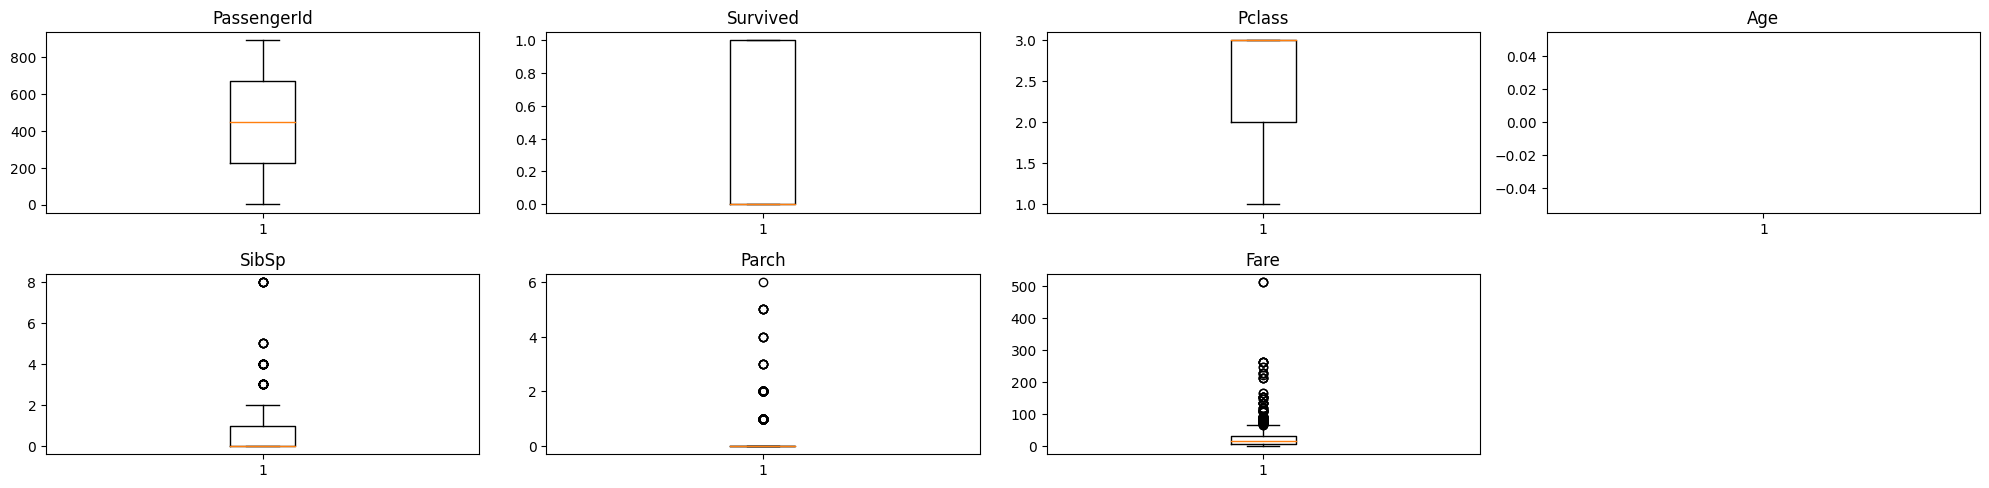

In [38]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 12))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* No need for outlier treatment

## Feature Engineering

In [39]:
# Missing Value Treatment Function
def treat_missing_values(df):
    # For numerical columns, excluding 'Survived'
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = num_cols[num_cols != 'Survived']  # Exclude 'Survived' column

    imputer = SimpleImputer(strategy='mean')
    # Fit and transform on training data
    df[num_cols] = imputer.fit_transform(df[num_cols])

    # For categorical columns excluding 'Cabin' and 'Survived'
    cat_cols = df.select_dtypes(include=['object']).columns
    cat_cols = cat_cols[(cat_cols != 'Cabin') & (cat_cols != 'Survived')]  # Exclude 'Cabin' and 'Survived' columns

    imputer = SimpleImputer(strategy='most_frequent')
    # Fit and transform on training data excluding 'Cabin' and 'Survived'
    df[cat_cols] = imputer.fit_transform(df[cat_cols])
    
    return df

In [40]:
# Feature Engineering Function
def feature_engineering(df):
    # Convert 'Sex' to binary
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    # Create 'FamilySize' feature
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # Create age bins
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])
    
    # Create fare bins
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])
    
    # Feature engineering on person's title
    df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
    # Title Grouping
    title_mapping = {
        'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
        'Don': 'Royalty', 'Rev': 'Officer', 'Dr': 'Officer', 'Mme': 'Mrs', 'Ms': 'Mrs',
        'Major': 'Officer', 'Lady': 'Royalty', 'Sir': 'Royalty', 'Mlle': 'Miss',
        'Col': 'Officer', 'Capt': 'Officer', 'the Countess': 'Royalty', 'Jonkheer': 'Royalty',
        'Dona': 'Royalty'
    }
    df['Title'] = df['Title'].map(title_mapping).fillna('Other')
    
    # Creates categories based on the cabin letter (n stands for null) We will treat null values like its own category
    df['Cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
    
    # Cabin Feature Refinement
    df['Cabin_adv'] = df['Cabin_adv'].replace({'A': 'ABC', 'B': 'ABC', 'C': 'ABC', 'D': 'DE', 'E': 'DE', 'F': 'FG', 'G': 'FG'})
    
    # Numeric vs non-numeric tickets
    df['Num_vs_let_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
    
    # Family Size Bins
    df['FamilySizeBin'] = pd.cut(df['FamilySize'], bins=[0, 1, 4, 7, np.inf], labels=['Solo', 'Small', 'Medium', 'Large'])
    
    # Interaction feature
    df['Pclass_Sex'] = df['Pclass'].astype(str) + '_' + df['Sex'].astype(str)
    
    # Extract ticket prefix
    df['TicketPrefix'] = df.Ticket.str.extract(r'([A-Za-z]+)', expand=False).fillna('None')
    
    # Extract deck information from cabin
    df['Deck'] = df['Cabin'].str[0].fillna('Unknown')
    
    # Dropping columns
    df.drop(['SibSp', 'Name', 'Cabin', 'Parch', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
    
    return df


#### Changes:

* Sex turned into numerical values 
* Age removed after creating Agebin (5 different age categories)
* Fare removed after creating FareBin (4 different categories on the ticket price)
* Name removed after creating Title (separation the title from the name) cause we predict on ID so the name is not a relevant data
* Cabin removed after creating Cabin_adv (separates cabins to categories) and because there lots of missing values in Cabin (n/a) I turned them to a separate caregory - n 
* Ticket removed after creating Num_vs_let_ticket that shows the numeric (1) and non  numeric (0) tickets 

#### Additional changes:

* Cabin_adv was improved and cabins were grouped by categories
* Title was improves my placing the titles into categories
* FamilySizeBin was created with categories fo the sidze of the families

(The additional changes didn't improve my model performance)

### Preparation for Modeling

In [41]:
# Apply missing value treatment before splitting the data
df = treat_missing_values(df)
df_test = treat_missing_values(df_test)

# Apply feature engineering to both train and test datasets
df = feature_engineering(df)
df_test = feature_engineering(df_test)

# Specify the columns for which to create dummy variables
columns_to_dummy = ['FamilySizeBin', 'Cabin_adv', 'Title', 'FareBin', 'AgeBin', 'Embarked', 'Pclass_Sex', 'TicketPrefix', 'Deck']

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=columns_to_dummy, drop_first=True, dtype=int)

# Ensure test data has the same columns as training data, excluding 'Survived'
columns_to_reindex = [col for col in df.columns if col != 'Survived']
df_test = df_test.reindex(columns=columns_to_reindex, fill_value=0)

# Convert DataFrame to NumPy arrays
X = df.drop(["Survived", "PassengerId"], axis=1).to_numpy()  # Exclude 'Survived' and 'PassengerId'
y = df["Survived"].to_numpy()

# Splitting train data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# Checking the dimensions of the split data
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_val:", X_val.shape)

# Preparing test data for prediction
X_test = df_test.drop(["PassengerId"], axis=1).to_numpy()  # Exclude 'PassengerId'

# Checking the dimensions of the test data
print("Dimensions of X_test:", X_test.shape)

Dimensions of X_train: (668, 56)
Dimensions of X_val: (223, 56)
Dimensions of X_test: (418, 56)


In [42]:
print(type(X_train), type(y_train), type(X_val), type(y_val), type(X_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Model Building

* Function to output different metrics on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [45]:
# Custom Scoring Metric Definition
scorer = metrics.make_scorer(metrics.f1_score)

### Building Initial Models 
* Different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV
- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [46]:
# Creating pipelines for models that benefit from feature scaling
logistic_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1, max_iter=1000)
)

knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_jobs=-1)
)

nn_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=1, max_iter=300)
)

svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

# List to store all the models
models = [
    ("Logistic regression", logistic_pipeline),
    ("Bagging", BaggingClassifier(random_state=1, n_jobs=-1)),
    ("Random forest", RandomForestClassifier(random_state=1, n_jobs=-1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)),
    ("dtree", DecisionTreeClassifier(random_state=1)),
    ("k-NN", knn_pipeline),
    ("Neural Network", nn_pipeline),
    ("SVM", svm_pipeline),
    ("CatBoost", CatBoostClassifier(random_state=1, verbose=0)),
    ("ExtraTrees", ExtraTreesClassifier(random_state=1, n_jobs=-1)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(random_state=1)),
    ("LGBM", LGBMClassifier(random_state=1, n_jobs=-1))
]

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    if hasattr(model, 'n_jobs'):
        model = model.set_params(n_jobs=-1)  # Set n_jobs=-1 if the model supports it
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {:.2f}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {:.2f}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.75
Bagging: 0.76
Random forest: 0.77
GBM: 0.79
Adaboost: 0.75
Xgboost: 0.76
dtree: 0.73
k-NN: 0.71
Neural Network: 0.76
SVM: 0.75
CatBoost: 0.79
ExtraTrees: 0.75
HistGradientBoosting: 0.75
[LightGBM] [Info] Number of positive: 205, number of negative: 329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 534, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383895 -> initscore=-0.473048
[LightGBM] [Info] Start training from score -0.473048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

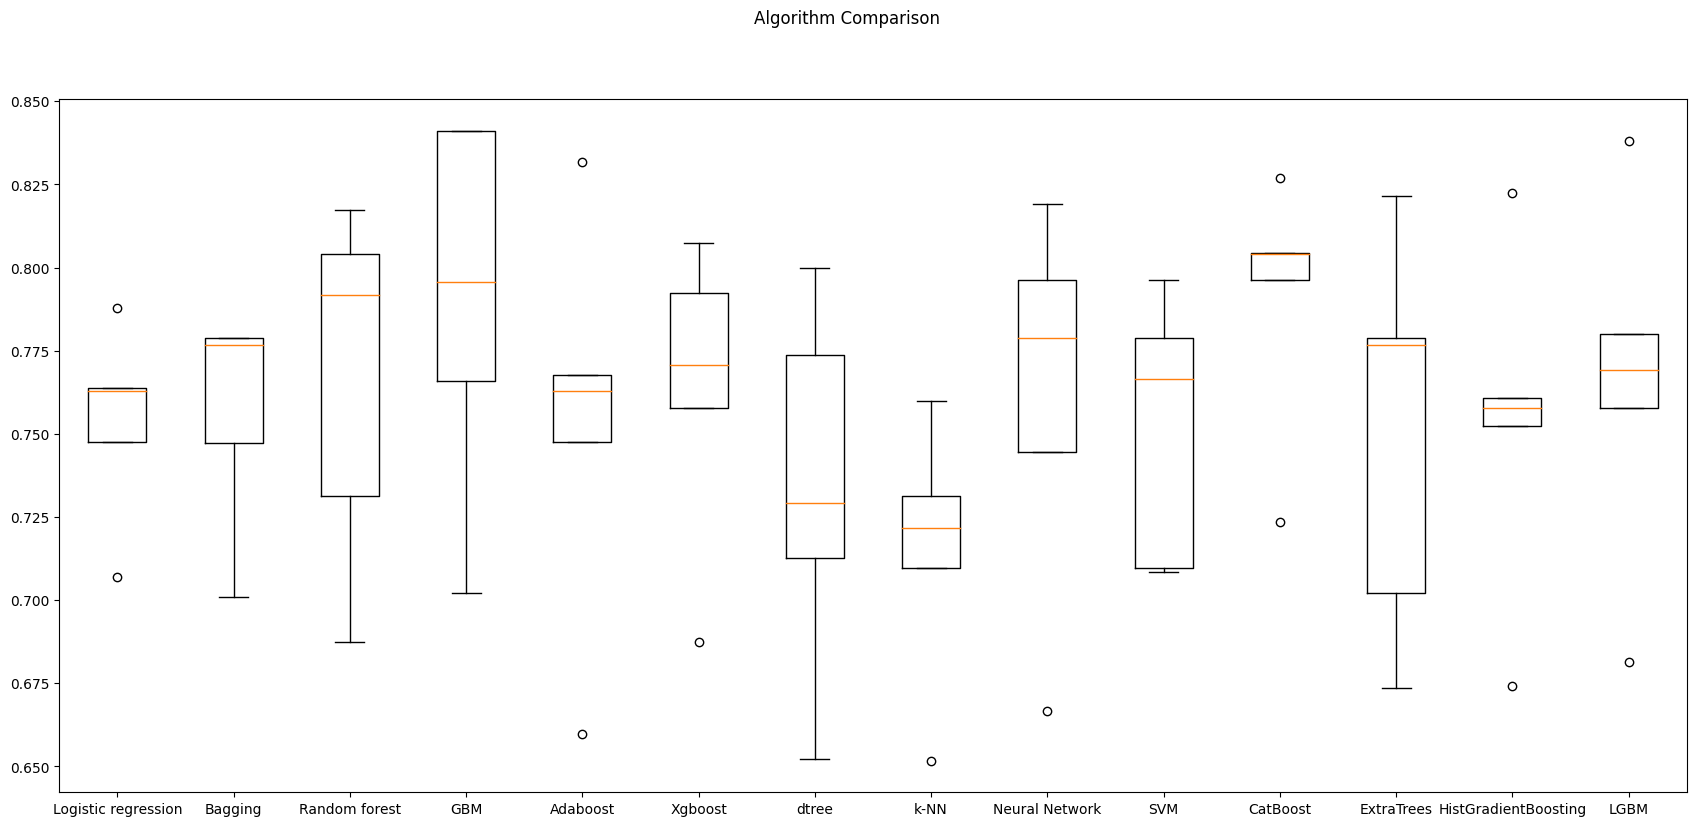

In [47]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(21, 9))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

* Best performance is from Logistic regression and GBM

### Model Building with oversampled data

In [48]:
# Before OverSampling
print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)}\n")

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# After OverSampling
print(f"After OverSampling, counts of label '1': {sum(y_train_over == 1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_over == 0)}\n")

print(f"After OverSampling, the shape of train_X: {X_train_over.shape}")
print(f"After OverSampling, the shape of train_y: {y_train_over.shape}\n")

Before OverSampling, counts of label '1': 256
Before OverSampling, counts of label '0': 412

After OverSampling, counts of label '1': 412
After OverSampling, counts of label '0': 412

After OverSampling, the shape of train_X: (824, 56)
After OverSampling, the shape of train_y: (824,)



In [49]:
# Creating a pipeline that scales the data and then fits the logistic regression model
logistic_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1, max_iter=1000)
)

knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_jobs=-1)
)

nn_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=1, max_iter=300)
)

svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

# List to store all the models
models = [
    ("Logistic regression", logistic_pipeline),
    ("Bagging", BaggingClassifier(random_state=1, n_jobs=-1)),
    ("Random forest", RandomForestClassifier(random_state=1, n_jobs=-1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)),
    ("dtree", DecisionTreeClassifier(random_state=1)),
    ("k-NN", knn_pipeline),
    ("Neural Network", nn_pipeline),
    ("SVM", svm_pipeline),
    ("CatBoost", CatBoostClassifier(random_state=1, verbose=0)),
    ("ExtraTrees", ExtraTreesClassifier(random_state=1, n_jobs=-1)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(random_state=1)),
    ("LGBM", LGBMClassifier(random_state=1, n_jobs=-1))
]

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )  
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over) 
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8225955610310625
Bagging: 0.8265189873417722
Random forest: 0.8422854856216467
GBM: 0.856977113762027
Adaboost: 0.8289933874249307
Xgboost: 0.8433997997271451
dtree: 0.8113885814405366
k-NN: 0.8266566246389209
Neural Network: 0.8518410106933325
SVM: 0.8347918524827902
CatBoost: 0.8544550547491724
ExtraTrees: 0.8447722465784959
HistGradientBoosting: 0.8485799534869946
[LightGBM] [Info] Number of positive: 330, number of negative: 329
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 659, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500759 -> initscore=0.003035
[LightGBM] [Info] Start training from score 0.003035
[LightGBM] [Warning] No further splits with positive gain, best gain: 

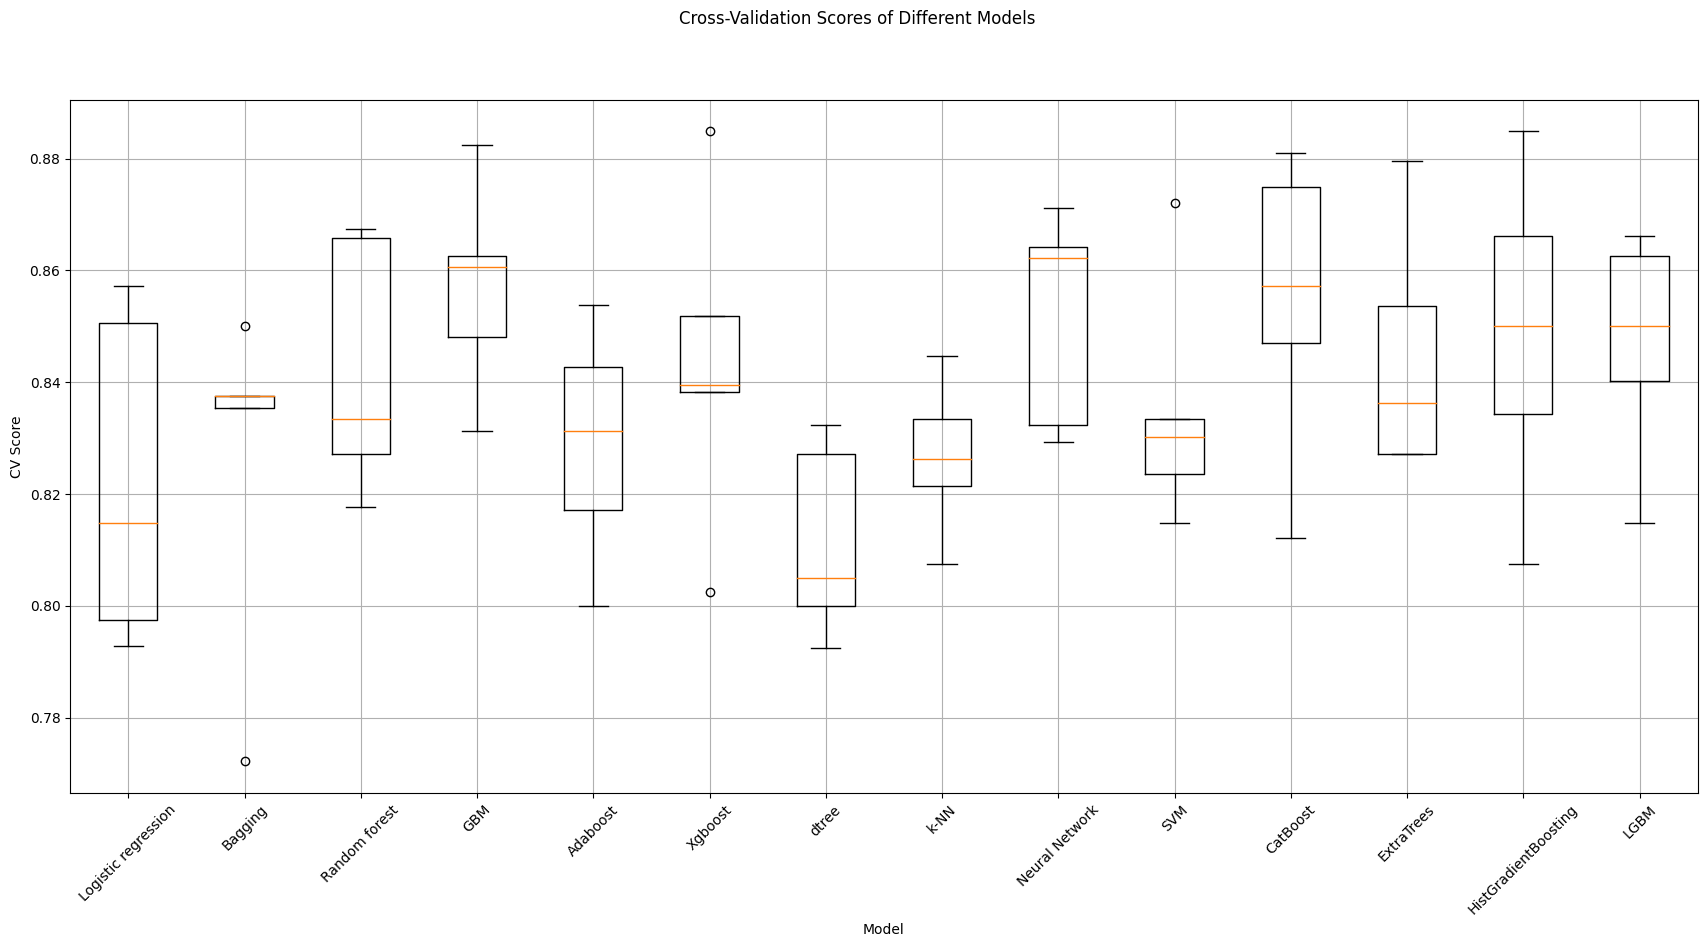

In [50]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(21, 9))
fig.suptitle("Cross-Validation Scores of Different Models")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.xlabel('Model')
plt.ylabel('CV Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* GBM, Xgboost, Adaboost and Random forest have the best performance with oversampling

### Model Building with undersampled data

In [51]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Before UnderSampling
print(f"Before UnderSampling, counts of label '1': {sum(y_train == 1)}")
print(f"Before UnderSampling, counts of label '0': {sum(y_train == 0)}\n")

# After UnderSampling
print(f"After UnderSampling, counts of label '1': {sum(y_train_un == 1)}")
print(f"After UnderSampling, counts of label '0': {sum(y_train_un == 0)}\n")

# Shape of train_X and train_y after UnderSampling
print(f"After UnderSampling, the shape of train_X: {X_train_un.shape}")
print(f"After UnderSampling, the shape of train_y: {y_train_un.shape}\n")

Before UnderSampling, counts of label '1': 256
Before UnderSampling, counts of label '0': 412

After UnderSampling, counts of label '1': 256
After UnderSampling, counts of label '0': 256

After UnderSampling, the shape of train_X: (512, 56)
After UnderSampling, the shape of train_y: (512,)



In [52]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Creating a pipeline that scales the data and then fits the logistic regression model
logistic_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1, max_iter=1000)
)

knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_jobs=-1)
)

nn_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=1, max_iter=300)
)

svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

# List to store all the models
models = [
    ("Logistic regression", logistic_pipeline),
    ("Bagging", BaggingClassifier(random_state=1, n_jobs=-1)),
    ("Random forest", RandomForestClassifier(random_state=1, n_jobs=-1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)),
    ("dtree", DecisionTreeClassifier(random_state=1)),
    ("k-NN", knn_pipeline),
    ("Neural Network", nn_pipeline),
    ("SVM", svm_pipeline),
    ("CatBoost", CatBoostClassifier(random_state=1, verbose=0)),
    ("ExtraTrees", ExtraTreesClassifier(random_state=1, n_jobs=-1)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(random_state=1)),
    ("LGBM", LGBMClassifier(random_state=1, n_jobs=-1))
]

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )  
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8007533625655322
Bagging: 0.8024141964478098
Random forest: 0.825943604088249
GBM: 0.8264382698211508
Adaboost: 0.7944982217836759
Xgboost: 0.8221776353324299
dtree: 0.7736991341991343
k-NN: 0.7812940710264689
Neural Network: 0.7881247799641613
SVM: 0.8122613645979981
CatBoost: 0.8204325550789827
ExtraTrees: 0.79786317289402
HistGradientBoosting: 0.8078439522223532
[LightGBM] [Info] Number of positive: 205, number of negative: 204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501222 -> initscore=0.004890
[LightGBM] [Info] Start training from score 0.004890
[LightGBM

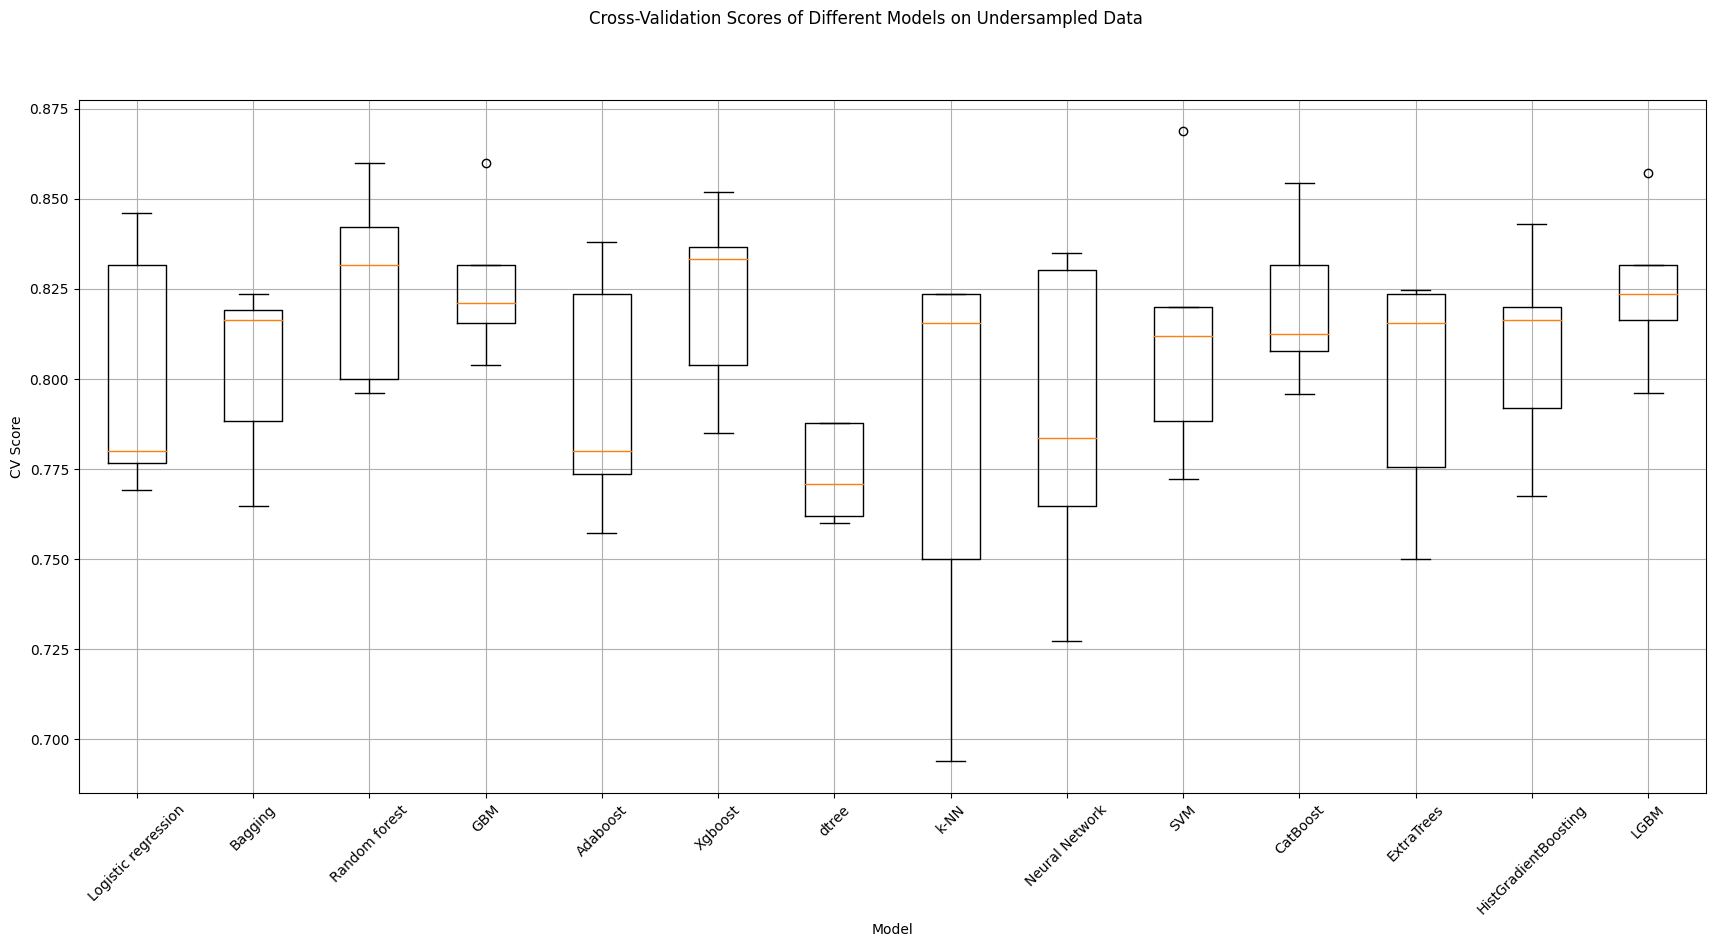

In [53]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(21, 9))
fig.suptitle("Cross-Validation Scores of Different Models on Undersampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.xlabel('Model')
plt.ylabel('CV Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* Logistic regression, GBM, Random forest and Xgboost are the top models with undersampling

## Hyperparameter Tuning

Model tunning will be performed as follows:

* GBM, Xgboost, LGBM,HGB, Catboost, Neural Network and Random forest on Oversample 

* Xgboost, Random forest on Undersample

The other models didn't show good performance and they won't be considered for further tunning

### Tuning Neural Network using oversampled data

In [54]:
# Define the pipeline with StandardScaler and MLPClassifier
model_nn_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=1, max_iter=3000)
)

# Define the parameter grid for RandomizedSearchCV
param_grid_nn = {
    'mlpclassifier__hidden_layer_sizes': [(15,), (10,), (10, 10)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__alpha': [1e-3, 1e-2],
    'mlpclassifier__learning_rate': ['adaptive'],
    'mlpclassifier__batch_size': [128],
    'mlpclassifier__early_stopping': [True],
    'mlpclassifier__validation_fraction': [0.2],
    'mlpclassifier__tol': [1e-4],
    'mlpclassifier__n_iter_no_change': [10]
}



# Perform RandomizedSearchCV on undersampled data
random_search_nn = RandomizedSearchCV(
    estimator=model_nn_pipeline,
    param_distributions=param_grid_nn,
    n_iter=30,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    random_state=1,
    verbose=1
)

# Fit the model with undersampled data
random_search_nn.fit(X_train_over, y_train_over)

# Print the best parameters and the best score from RandomizedSearchCV
print(f"Best parameters are {random_search_nn.best_params_} with CV score={random_search_nn.best_score_}:")

# Extract the best parameters from the RandomizedSearchCV result
best_params_nn = random_search_nn.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters are {'mlpclassifier__validation_fraction': 0.2, 'mlpclassifier__tol': 0.0001, 'mlpclassifier__solver': 'adam', 'mlpclassifier__n_iter_no_change': 10, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__hidden_layer_sizes': (10, 10), 'mlpclassifier__early_stopping': True, 'mlpclassifier__batch_size': 128, 'mlpclassifier__alpha': 0.001, 'mlpclassifier__activation': 'relu'} with CV score=0.8090222771449961:


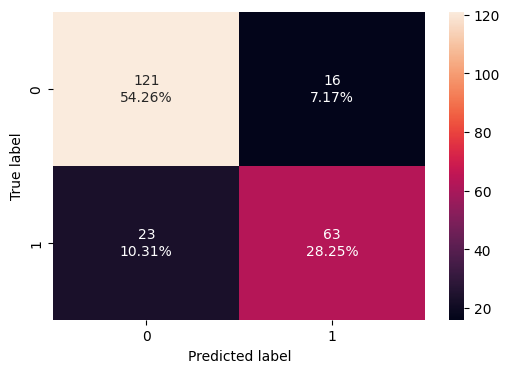

In [55]:
# Create MLPClassifier with best parameters
over_tuned_nn = make_pipeline(
    StandardScaler(),
    MLPClassifier(**{key.split('__')[1]: value for key, value in best_params_nn.items()}, random_state=1, max_iter=3000)
)

# Fit the model with undersampled data
over_tuned_nn.fit(X_train_over, y_train_over)

# Confusion matrix for validation set
confusion_matrix_sklearn(over_tuned_nn, X_val, y_val)
plt.show()

In [56]:
onn_train_perf = model_performance_classification_sklearn(over_tuned_nn, X_train_over, y_train_over)
onn_train_perf

,Accuracy,Recall,Precision,F1
0,0.821602,0.788835,0.844156,0.815558


In [57]:
onn_val_perf = model_performance_classification_sklearn(over_tuned_nn, X_val, y_val)
onn_val_perf 

,Accuracy,Recall,Precision,F1
0,0.825112,0.732558,0.797468,0.763636


Best ROC curve:
AUC: 0.8491
Optimal threshold: 0.4814
True Positive Rate at optimal threshold: 0.7558
False Positive Rate at optimal threshold: 0.1241


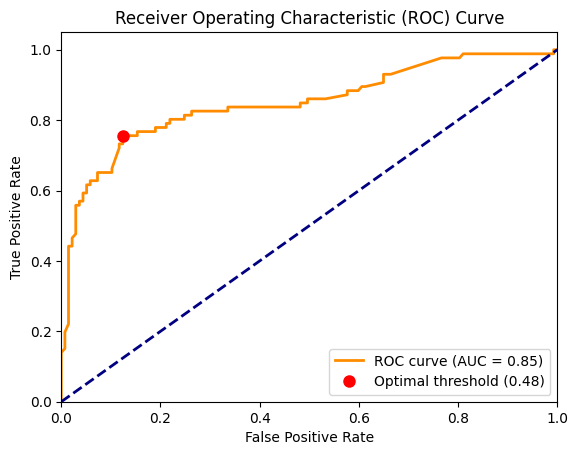

In [58]:
# Get predictions probabilities for the validation set
y_pred_proba = over_tuned_nn.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the best ROC curve information
print(f"Best ROC curve:")
print(f"AUC: {roc_auc:.4f}")
print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"True Positive Rate at optimal threshold: {tpr[optimal_idx]:.4f}")
print(f"False Positive Rate at optimal threshold: {fpr[optimal_idx]:.4f}")

# Visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=8, label=f'Optimal threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters are {'mlpclassifier__validation_fraction': 0.2, 'mlpclassifier__tol': 0.0001, 'mlpclassifier__solver': 'adam', 'mlpclassifier__n_iter_no_change': 10, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__hidden_layer_sizes': (10, 10), 'mlpclassifier__early_stopping': True, 'mlpclassifier__batch_size': 128, 'mlpclassifier__alpha': 0.01, 'mlpclassifier__activation': 'relu'} with CV score=0.8693888421729427:


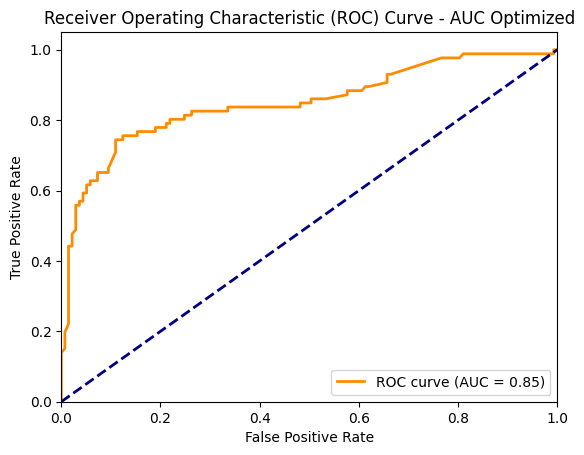

Performance on validation set for original model (over_tuned_nn):
   Accuracy    Recall  Precision        F1
0  0.825112  0.732558   0.797468  0.763636

Performance on validation set for AUC-optimized model (over_tuned_nn_auc):
   Accuracy    Recall  Precision        F1
0  0.829596  0.732558   0.807692  0.768293

AUC-ROC score for original model: 0.8491
AUC-ROC score for AUC-optimized model: 0.8495


In [59]:
# Define the pipeline with StandardScaler and MLPClassifier
model_nn_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=1, max_iter=3000)
)

# Define the parameter grid for RandomizedSearchCV
param_grid_nn = {
    'mlpclassifier__hidden_layer_sizes': [(15,), (10,), (10, 10)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__alpha': [1e-3, 1e-2],
    'mlpclassifier__learning_rate': ['adaptive'],
    'mlpclassifier__batch_size': [128],
    'mlpclassifier__early_stopping': [True],
    'mlpclassifier__validation_fraction': [0.2],
    'mlpclassifier__tol': [1e-4],
    'mlpclassifier__n_iter_no_change': [10]
}

# Create a custom scorer for AUC-ROC
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform RandomizedSearchCV on oversampled data
random_search_nn_auc = RandomizedSearchCV(
    estimator=model_nn_pipeline,
    param_distributions=param_grid_nn,
    n_iter=30,
    scoring=auc_scorer,
    n_jobs=-1,
    cv=3,
    random_state=1,
    verbose=1
)

# Fit the model with oversampled data
random_search_nn_auc.fit(X_train_over, y_train_over)

# Print the best parameters and the best score from RandomizedSearchCV
print(f"Best parameters are {random_search_nn_auc.best_params_} with CV score={random_search_nn_auc.best_score_}:")

# Extract the best parameters from the RandomizedSearchCV result
best_params_nn_auc = random_search_nn_auc.best_params_

# Create MLPClassifier with best parameters
over_tuned_nn_auc = make_pipeline(
    StandardScaler(),
    MLPClassifier(**{key.split('__')[1]: value for key, value in best_params_nn_auc.items()}, random_state=1, max_iter=3000)
)

# Fit the model with oversampled data
over_tuned_nn_auc.fit(X_train_over, y_train_over)

# Calculate and visualize ROC curve for the new model
y_pred_proba_auc = over_tuned_nn_auc.predict_proba(X_val)[:, 1]
fpr_auc, tpr_auc, thresholds_auc = roc_curve(y_val, y_pred_proba_auc)
roc_auc_optimized = auc(fpr_auc, tpr_auc)

plt.figure()
plt.plot(fpr_auc, tpr_auc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AUC Optimized')
plt.legend(loc="lower right")
plt.show()

# Print performance metrics for both models
print("Performance on validation set for original model (over_tuned_nn):")
print(model_performance_classification_sklearn(over_tuned_nn, X_val, y_val))

print("\nPerformance on validation set for AUC-optimized model (over_tuned_nn_auc):")
print(model_performance_classification_sklearn(over_tuned_nn_auc, X_val, y_val))

# Calculate and print AUC-ROC scores for both models
y_pred_proba_original = over_tuned_nn.predict_proba(X_val)[:, 1]
auc_roc_original = roc_auc_score(y_val, y_pred_proba_original)

y_pred_proba_auc = over_tuned_nn_auc.predict_proba(X_val)[:, 1]
auc_roc_optimized = roc_auc_score(y_val, y_pred_proba_auc)

print(f"\nAUC-ROC score for original model: {auc_roc_original:.4f}")
print(f"AUC-ROC score for AUC-optimized model: {auc_roc_optimized:.4f}")

* The models are overfitting a bit and the performance is average

### Tuning Gradient Boosting using oversampled data

In [60]:
# Define model with default parameters
Model_Ogbm = GradientBoostingClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": [300], # A balance between the number of trees
    "learning_rate": [0.005, 0.007], # Fine-tuning the learning rate
    "subsample": [0.99], # Almost using all samples without compromising randomness
    "max_features": [0.54], # A balance in the number of features used
    "max_depth": [2], # Keeping depth low to reduce complexity
    "min_samples_split": [9], # A balance in the minimum number of samples required to split
    "min_samples_leaf": [5] # A balance in the minimum number of samples required at a leaf node
}

# RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_distributions=param_grid,
    scoring='f1',
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=1
)
# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Print best parameters and best score from RandomizedSearchCV
print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get best parameters from RandomizedSearchCV
best_params_1 = randomized_cv.best_params_

Best parameters are {'subsample': 0.99, 'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.54, 'max_depth': 2, 'learning_rate': 0.007} with CV score=0.8017050175567342:


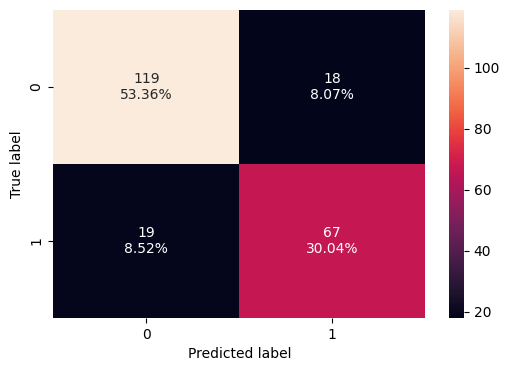

In [61]:
# Create GradientBoostingClassifier with conditional parameters
over_tuned_gbm = GradientBoostingClassifier(**best_params_1, random_state=1)

# Fitting the model on the oversampled data
over_tuned_gbm.fit(X_train_over, y_train_over)

# Confusion matrix for validation set
confusion_matrix_sklearn(over_tuned_gbm, X_val, y_val)
plt.show()

In [62]:
ogbm_train_perf = model_performance_classification_sklearn(over_tuned_gbm, X_train_over, y_train_over)
ogbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.821602,0.803398,0.833753,0.818294


In [63]:
ogbm_val_perf = model_performance_classification_sklearn(over_tuned_gbm, X_val, y_val)
ogbm_val_perf 

,Accuracy,Recall,Precision,F1
0,0.834081,0.77907,0.788235,0.783626


Best ROC curve:
AUC: 0.8486
Optimal threshold: 0.5259
True Positive Rate at optimal threshold: 0.7791
False Positive Rate at optimal threshold: 0.1168


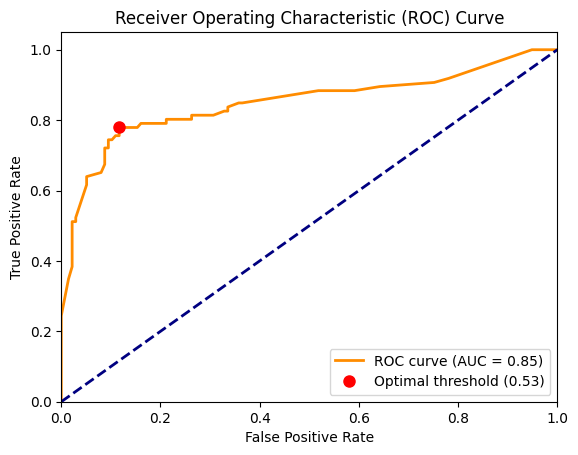

In [64]:
# Get predictions probabilities for the validation set
y_pred_proba = over_tuned_gbm.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the best ROC curve information
print(f"Best ROC curve:")
print(f"AUC: {roc_auc:.4f}")
print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"True Positive Rate at optimal threshold: {tpr[optimal_idx]:.4f}")
print(f"False Positive Rate at optimal threshold: {fpr[optimal_idx]:.4f}")

# Visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=8, label=f'Optimal threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters are {'subsample': 0.99, 'n_estimators': 65, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.54, 'max_depth': 3, 'learning_rate': 0.007} with CV score=0.886968456813572:


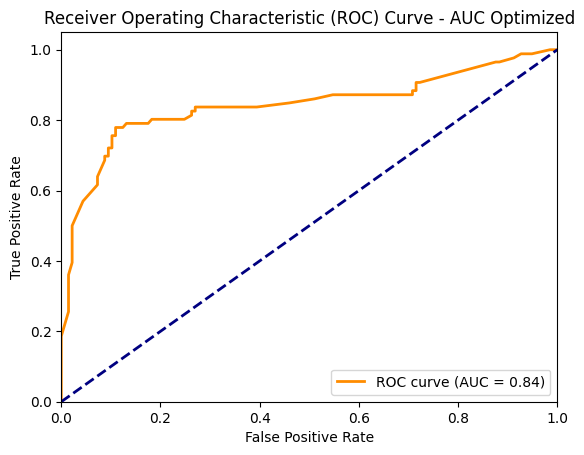

Performance on validation set for original model (over_tuned_gbm):
   Accuracy   Recall  Precision        F1
0  0.834081  0.77907   0.788235  0.783626

Performance on validation set for AUC-optimized model (over_tuned_gbm_auc):
   Accuracy   Recall  Precision        F1
0  0.838565  0.77907   0.797619  0.788235

AUC-ROC score for original model: 0.8486
AUC-ROC score for AUC-optimized model: 0.8420


In [65]:
# Define the parameter grid for RandomizedSearchCV
param_grid_gbm = {
    "n_estimators": [50, 65], # A balance between the number of trees
    "learning_rate": [0.005, 0.007], # Fine-tuning the learning rate
    "subsample": [0.99], # Almost using all samples without compromising randomness
    "max_features": [0.54], # A balance in the number of features used
    "max_depth": [2, 3], # Keeping depth low to reduce complexity
    "min_samples_split": [9], # A balance in the minimum number of samples required to split
    "min_samples_leaf": [5] # A balance in the minimum number of samples required at a leaf node
}

# Create a custom scorer for AUC-ROC
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform RandomizedSearchCV on oversampled data
random_search_gbm_auc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_distributions=param_grid_gbm,
    n_iter=50,
    scoring=auc_scorer,
    n_jobs=-1,
    cv=5,
    random_state=1,
    verbose=1
)

# Fit the model with oversampled data
random_search_gbm_auc.fit(X_train_over, y_train_over)

# Print the best parameters and the best score from RandomizedSearchCV
print(f"Best parameters are {random_search_gbm_auc.best_params_} with CV score={random_search_gbm_auc.best_score_}:")

# Extract the best parameters from the RandomizedSearchCV result
best_params_gbm_auc = random_search_gbm_auc.best_params_

# Create GradientBoostingClassifier with best parameters
over_tuned_gbm_auc = GradientBoostingClassifier(**best_params_gbm_auc, random_state=1)

# Fit the model with oversampled data
over_tuned_gbm_auc.fit(X_train_over, y_train_over)

# Calculate and visualize ROC curve for the new model
y_pred_proba_auc = over_tuned_gbm_auc.predict_proba(X_val)[:, 1]
fpr_auc, tpr_auc, thresholds_auc = roc_curve(y_val, y_pred_proba_auc)
roc_auc_optimized = auc(fpr_auc, tpr_auc)

plt.figure()
plt.plot(fpr_auc, tpr_auc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AUC Optimized')
plt.legend(loc="lower right")
plt.show()

# Print performance metrics for both models
print("Performance on validation set for original model (over_tuned_gbm):")
print(model_performance_classification_sklearn(over_tuned_gbm, X_val, y_val))

print("\nPerformance on validation set for AUC-optimized model (over_tuned_gbm_auc):")
print(model_performance_classification_sklearn(over_tuned_gbm_auc, X_val, y_val))

# Calculate and print AUC-ROC scores for both models
y_pred_proba_original = over_tuned_gbm.predict_proba(X_val)[:, 1]
auc_roc_original = roc_auc_score(y_val, y_pred_proba_original)

y_pred_proba_auc = over_tuned_gbm_auc.predict_proba(X_val)[:, 1]
auc_roc_optimized = roc_auc_score(y_val, y_pred_proba_auc)

print(f"\nAUC-ROC score for original model: {auc_roc_original:.4f}")
print(f"AUC-ROC score for AUC-optimized model: {auc_roc_optimized:.4f}")

* The models show good performance almost no overfitting

## Tuning Optuna Gradient Boosting using oversampled data

[I 2024-07-19 13:27:31,111] A new study created in memory with name: no-name-217671d6-a147-449b-ab7a-d2f41c0458a2
[I 2024-07-19 13:27:31,483] Trial 0 finished with value: -18.07310101562974 and parameters: {'n_estimators': 345, 'learning_rate': 0.2536999076681772, 'subsample': 0.846398788362281, 'max_features': 0.3993292420985183, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: -18.07310101562974.
[I 2024-07-19 13:27:31,764] Trial 1 finished with value: -15.74565201545302 and parameters: {'n_estimators': 256, 'learning_rate': 0.19030368381735815, 'subsample': 0.8202230023486418, 'max_features': 0.4540362888980227, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 1 with value: -15.74565201545302.
[I 2024-07-19 13:27:32,222] Trial 2 finished with value: -5.557723338712033 and parameters: {'n_estimators': 473, 'learning_rate': 0.020589728197687916, 'subsample': 0.73636499344142, 'max_features': 0.19170225492671691, '

Best parameters: {'n_estimators': 241, 'learning_rate': 0.01018739106267007, 'subsample': 0.7879163897996206, 'max_features': 0.2857970934098881, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 6}
Train performance:
   Accuracy    Recall  Precision        F1
0   0.81432  0.776699   0.839895  0.807062

Validation performance:
   Accuracy   Recall  Precision        F1
0  0.843049  0.77907   0.807229  0.792899


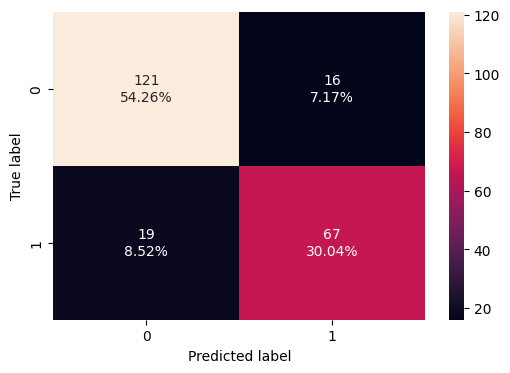

In [66]:
# Define a fixed random seed
RANDOM_SEED = 42

# Oversampling
ros = RandomOverSampler(random_state=RANDOM_SEED)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# Ensure all steps use the same random seed
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 240, 520),  # Adjusted range for n_estimators
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),  # Adjusted learning_rate range
        'subsample': trial.suggest_uniform('subsample', 0.7, 0.9),  # Narrowed down range for subsample
        'max_features': trial.suggest_uniform('max_features', 0.1, 0.6),  # Shrink max_features range
        'max_depth': trial.suggest_int('max_depth', 2, 2),  # Limited range for max_depth
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),  # Adjusted range for min_samples_split
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 9)  # Adjusted range for min_samples_leaf
    }

    model = GradientBoostingClassifier(random_state=RANDOM_SEED, **params)
    model.fit(X_train_over, y_train_over)  # Use the oversampled data
    y_pred_train = model.predict(X_train_over)
    y_pred_val = model.predict(X_val)
    
    train_f1 = f1_score(y_train_over, y_pred_train)
    val_f1 = f1_score(y_val, y_pred_val)

    # Penalize based on the difference in F1-score between train and val to mitigate overfitting
    penalty = abs(train_f1 - val_f1) * 100  # Multiply by 100 for emphasis

    return val_f1 - penalty  # Minimize the penalty-adjusted F1-score difference

# Run Optuna optimization with a fixed random seed
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
study.optimize(objective, n_trials=50)

# Get the best parameters
opt_ogbm_best_params = study.best_params
print("Best parameters:", opt_ogbm_best_params)

# Train the model with the best parameters found
optuna_ogbm = GradientBoostingClassifier(random_state=RANDOM_SEED, **opt_ogbm_best_params)
optuna_ogbm.fit(X_train_over, y_train_over)  # Use the oversampled data

# Evaluate performance on train and validation sets
opt_ogbm_train_perf = model_performance_classification_sklearn(optuna_ogbm, X_train_over, y_train_over)
opt_ogbm_val_perf = model_performance_classification_sklearn(optuna_ogbm, X_val, y_val)

print("Train performance:")
print(opt_ogbm_train_perf)
print("\nValidation performance:")
print(opt_ogbm_val_perf)

# Confusion matrix for validation set
confusion_matrix_sklearn(optuna_ogbm, X_val, y_val)
plt.show()

* With a strong F1 score the Optuna GBM performs better than the normal one 

### Tuning XGboost with oversampled data

In [67]:
# Define the XGBoost classifier with random_seed=1
Model_Oxgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [105],
    "learning_rate": [0.0075],
    "max_depth": [1, 3],
    "min_child_weight": [2, 4],
    "subsample": [0.70, 0.75],
    "colsample_bytree": [0.70, 0.75],
    "gamma": [0.08, 0.12],
    "reg_alpha": [0.75, 1],
    "reg_lambda": [0.75, 1],
}


# Calling RandomizedSearchCV
randomized_cv_xgb = RandomizedSearchCV(
    estimator=Model_Oxgb,
    param_distributions=param_grid,
    scoring='roc_auc',
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_xgb.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:".format(randomized_cv_xgb.best_params_, randomized_cv_xgb.best_score_))

best_params_4 = randomized_cv_xgb.best_params_ 

Best parameters are {'subsample': 0.7, 'reg_lambda': 0.75, 'reg_alpha': 0.75, 'n_estimators': 105, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.0075, 'gamma': 0.08, 'colsample_bytree': 0.75} with CV score=0.8789676254094309:


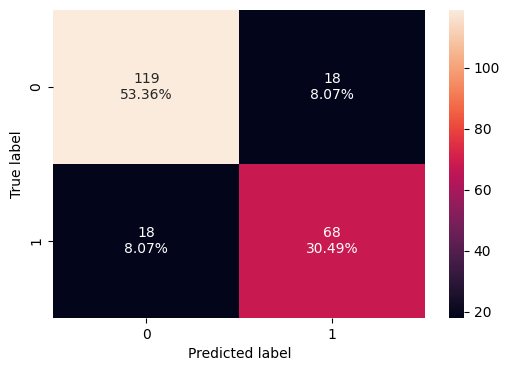

In [68]:
# Best parameters
over_tuned_xgboost = XGBClassifier(**best_params_4, random_state=1)

# Fitting the model on the oversampled data
over_tuned_xgboost.fit(X_train_over, y_train_over)

# Confusion matrix for validation set
confusion_matrix_sklearn(over_tuned_xgboost, X_val, y_val)
plt.show()

In [69]:
oxgb_train_perf = model_performance_classification_sklearn(over_tuned_xgboost, X_train_over, y_train_over)
oxgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.82767,0.800971,0.846154,0.822943


In [70]:
oxgb_val_perf = model_performance_classification_sklearn(over_tuned_xgboost, X_val, y_val)
oxgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.838565,0.790698,0.790698,0.790698


* The model show good validation score but it overfits a bit

### Tuning Optuna XGboost with oversampled data

[I 2024-07-19 13:28:04,073] A new study created in memory with name: no-name-9fa6a657-2272-4614-be16-e04c3727ef1f
[I 2024-07-19 13:28:04,268] Trial 0 finished with value: 0.7647058823529412 and parameters: {'n_estimators': 425, 'learning_rate': 0.4123206532618726, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.6468055921327309, 'colsample_bytree': 0.5779972601681014, 'gamma': 0.017425083650459836, 'reg_alpha': 3.9676050770529883, 'reg_lambda': 0.6358358856676253}. Best is trial 0 with value: 0.7647058823529412.
[I 2024-07-19 13:28:04,604] Trial 1 finished with value: 0.7674418604651162 and parameters: {'n_estimators': 625, 'learning_rate': 0.01083858126934475, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.6637017332034828, 'colsample_bytree': 0.5909124836035503, 'gamma': 0.055021352956030146, 'reg_alpha': 0.08179499475211674, 'reg_lambda': 0.3752055855124282}. Best is trial 1 with value: 0.7674418604651162.
[I 2024-07-19 13:28:04,804] Trial 2 finished with value: 0.77456

Best XGBoost parameters: {'n_estimators': 444, 'learning_rate': 0.017023924679767103, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.8620928130460336, 'colsample_bytree': 0.5675185454196875, 'gamma': 0.2795294986706086, 'reg_alpha': 0.010654448370779028, 'reg_lambda': 0.4681691304710638}
Optimized XGBoost Train performance:
   Accuracy    Recall  Precision        F1
0   0.81068  0.752427   0.851648  0.798969

Optimized XGBoost Validation performance:
   Accuracy   Recall  Precision        F1
0  0.847534  0.77907   0.817073  0.797619


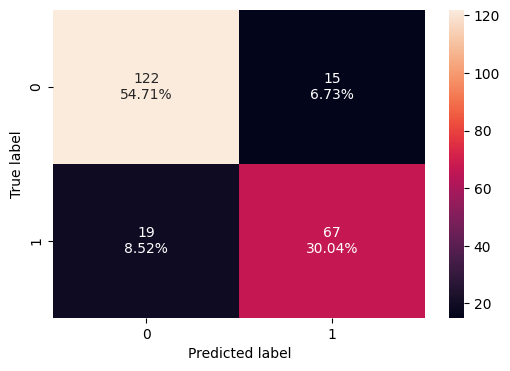

In [71]:
# Define a constant random seed for reproducibility
RANDOM_SEED = 42

# Define objective function for Optuna
def optuna_xgb_objective(trial):
    optuna_xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 800),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_uniform('gamma', 0.0, 0.3),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.01, 10.0)
    }
    optuna_xgb_model = XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss', **optuna_xgb_params)
    optuna_xgb_model.fit(X_train_over, y_train_over)
    y_pred = optuna_xgb_model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# Run Optuna optimization with a fixed random seed
optuna_xgb_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
optuna_xgb_study.optimize(optuna_xgb_objective, n_trials=50)

# Get the best parameters
optuna_xgb_best_params = optuna_xgb_study.best_params
print("Best XGBoost parameters:", optuna_xgb_best_params)

# Train the model with the best parameters found
optuna_xgb_model = XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss', **optuna_xgb_best_params)
optuna_xgb_model.fit(X_train_over, y_train_over)

# Evaluate performance on train and validation sets
optuna_xgb_train_perf = model_performance_classification_sklearn(optuna_xgb_model, X_train_over, y_train_over)
optuna_xgb_val_perf = model_performance_classification_sklearn(optuna_xgb_model, X_val, y_val)

print("Optimized XGBoost Train performance:")
print(optuna_xgb_train_perf)
print("\nOptimized XGBoost Validation performance:")
print(optuna_xgb_val_perf)

# Confusion matrix for validation set
confusion_matrix_sklearn(optuna_xgb_model, X_val, y_val)
plt.show()

* The Optuna verssion looks far better with a really hight and balanced F1 score

### Tuning XGboost with undersampled data

In [72]:
Model_Uxgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    "n_estimators": [95],
    "learning_rate": [0.0070],
    "max_depth": [3, 4],
    "min_child_weight": [2, 3],
    "subsample": [0.70, 0.75],
    "colsample_bytree": [0.70, 0.75],
    "gamma": [0.06, 0.10],
    "reg_alpha": [0.75, 1],
    "reg_lambda": [0.75, 1],
}


randomized_cv_xgb = RandomizedSearchCV(
    estimator=Model_Uxgb,
    param_distributions=param_grid,
    scoring='roc_auc',
    n_iter=20,
    n_jobs=-1,
    cv=3,
    random_state=1,
)

randomized_cv_xgb.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:".format(randomized_cv_xgb.best_params_, randomized_cv_xgb.best_score_))

best_params_5 = randomized_cv_xgb.best_params_

Best parameters are {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 95, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.007, 'gamma': 0.1, 'colsample_bytree': 0.75} with CV score=0.8795287143585204:


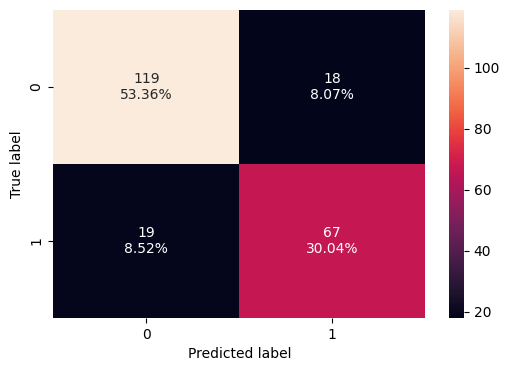

In [73]:
# Best parameters
under_tuned_xgboost = XGBClassifier(**best_params_5, random_state=1)

# Fitting the model on the oversampled data
under_tuned_xgboost.fit(X_train_un, y_train_un)

# Confusion matrix for validation set
confusion_matrix_sklearn(under_tuned_xgboost, X_val, y_val)
plt.show()

In [74]:
uxgb_train_perf = model_performance_classification_sklearn(under_tuned_xgboost, X_train_over, y_train_over)
uxgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.820388,0.803398,0.831658,0.817284


In [75]:
uxgb_val_perf = model_performance_classification_sklearn(under_tuned_xgboost, X_val, y_val)
uxgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.834081,0.77907,0.788235,0.783626


* The undersampled XGboost is overfitting a bit and it's far worst than the Optuna verssion

### Random forest using oversampled data

In [76]:
# Define the RandomForest classifier
Model_Orf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid_rf = {
    "n_estimators": np.arange(100, 201, 20),  # Slightly more trees for stability
    "max_features": ['sqrt'],  # 'sqrt' tends to work well for generalization
    "max_depth": [2,6],  # Lower maximum depth to prevent overfitting
    "min_samples_split": [12, 15, 18],  # Higher values to simplify the model
    "min_samples_leaf": [5, 7, 11],  # Higher values to ensure more generalization
    "bootstrap": [True]  # Bootstrap to add randomness and prevent overfitting
}

# Calling RandomizedSearchCV
randomized_cv_rf = RandomizedSearchCV(
    estimator=Model_Orf,
    param_distributions=param_grid_rf,
    scoring='roc_auc',
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_rf.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:".format(randomized_cv_rf.best_params_, randomized_cv_rf.best_score_))

best_params_orf = randomized_cv_rf.best_params_

Best parameters are {'n_estimators': 140, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True} with CV score=0.879960830830759:


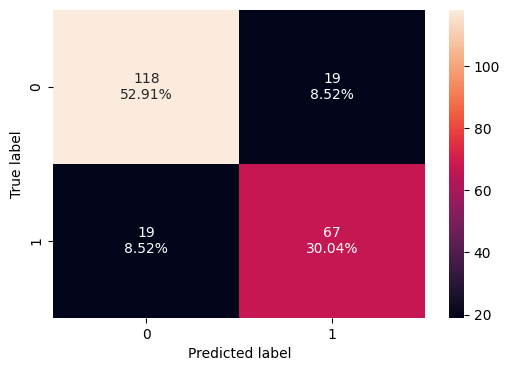

In [77]:
over_tuned_rf = RandomForestClassifier(**best_params_orf, random_state=1)

# Fitting the model on the oversampled data
over_tuned_rf.fit(X_train_over, y_train_over)

# Confusion matrix for validation set
confusion_matrix_sklearn(over_tuned_rf, X_val, y_val)
plt.show()

In [78]:
orf_train_perf = model_performance_classification_sklearn(over_tuned_rf, X_train_over, y_train_over)
orf_train_perf

,Accuracy,Recall,Precision,F1
0,0.842233,0.832524,0.84901,0.840686


In [79]:
orf_val_perf = model_performance_classification_sklearn(over_tuned_rf, X_val, y_val)
orf_val_perf

,Accuracy,Recall,Precision,F1
0,0.829596,0.77907,0.77907,0.77907


* The models has good validation F1 score but it's overfitting

### Tunning Optuna Random forest with oversampled data

[I 2024-07-19 13:29:30,429] A new study created in memory with name: no-name-1a1147fe-bb04-4723-8afc-f1838303e1d3
[I 2024-07-19 13:29:30,831] Trial 0 finished with value: 0.7457627118644067 and parameters: {'n_estimators': 212, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 13, 'max_features': 0.24041677639819287}. Best is trial 0 with value: 0.7457627118644067.
[I 2024-07-19 13:29:31,130] Trial 1 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 146, 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 0.737265320016441}. Best is trial 1 with value: 0.7836257309941521.
[I 2024-07-19 13:29:31,337] Trial 2 finished with value: 0.7928994082840237 and parameters: {'n_estimators': 106, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 0.26364247048639056}. Best is trial 2 with value: 0.7928994082840237.
[I 2024-07-19 13:29:31,629] Trial 3 finished with value: 0.7640449438202247 and parameters: {'

Best RF parameters: {'n_estimators': 325, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 0.2907440910457908}
Optimized RF Train performance:
   Accuracy    Recall  Precision       F1
0   0.81068  0.776699   0.833333  0.80402

Optimized RF Validation performance:
   Accuracy   Recall  Precision        F1
0  0.847534  0.77907   0.817073  0.797619


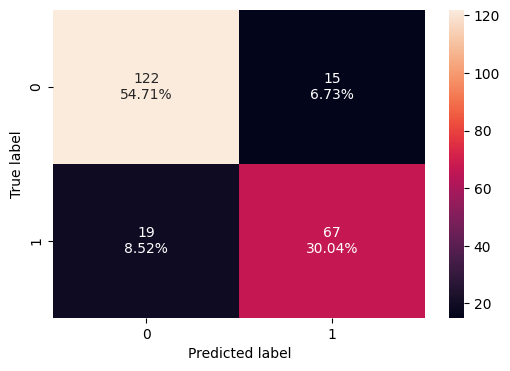

In [80]:
# Define a constant random seed for reproducibility
RANDOM_SEED = 42

# Define objective function for Optuna
def opt_rf_objective(trial):
    opt_rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 2, 3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 20),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0)
    }
    opt_rf_model = RandomForestClassifier(random_state=RANDOM_SEED, **opt_rf_params)
    opt_rf_model.fit(X_train_over, y_train_over)
    y_pred = opt_rf_model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# Run Optuna optimization with a fixed random seed
opt_rf_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
opt_rf_study.optimize(opt_rf_objective, n_trials=50)

# Get the best parameters
opt_rf_best_params = opt_rf_study.best_params
print("Best RF parameters:", opt_rf_best_params)

# Train the model with the best parameters found
opt_rf_model = RandomForestClassifier(random_state=RANDOM_SEED, **opt_rf_best_params)
opt_rf_model.fit(X_train_over, y_train_over)

# Evaluate performance on train and validation sets
opt_rf_train_perf = model_performance_classification_sklearn(opt_rf_model, X_train_over, y_train_over)
opt_rf_val_perf = model_performance_classification_sklearn(opt_rf_model, X_val, y_val)

print("Optimized RF Train performance:")
print(opt_rf_train_perf)
print("\nOptimized RF Validation performance:")
print(opt_rf_val_perf)

# Confusion matrix for validation set
confusion_matrix_sklearn(opt_rf_model, X_val, y_val)
plt.show()

* The Optuna verssion of the Random forest has the hightest validation score so far and almost no overfitting

### Random forest using undersampled data

In [81]:
# Define the RandomForest classifier
Model_Urf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid_rf = {
    "n_estimators": np.arange(100, 201, 25),  # Slightly more models
    "max_features": ['sqrt'],  # No change
    "max_depth": [3, 5, 7],  # Allowing more depth for complexity
    "min_samples_split": [7, 9, 11],  # A balance between previous and initial values
    "min_samples_leaf": [5, 7, 12],  # A balance between previous and initial values
    "bootstrap": [True, False]  # Both options to see which performs better
}

# Calling RandomizedSearchCV
randomized_cv_rf_under = RandomizedSearchCV(
    estimator=Model_Urf,
    param_distributions=param_grid_rf,
    scoring='roc_auc',
    n_iter=20,
    n_jobs=-1,
    cv=3,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_rf_under.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:".format(randomized_cv_rf_under.best_params_, randomized_cv_rf_under.best_score_))

best_params_rf_under = randomized_cv_rf_under.best_params_

Best parameters are {'n_estimators': 125, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': False} with CV score=0.8773090850567313:


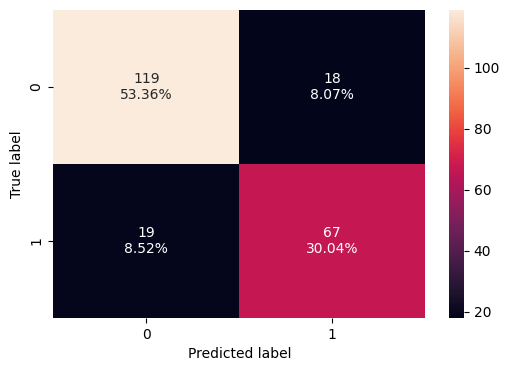

In [82]:
# Use the best parameters to define the final model
under_tuned_rf = RandomForestClassifier(**best_params_rf_under, random_state=1)

# Fitting the model on the undersampled data
under_tuned_rf.fit(X_train_un, y_train_un)

# Confusion matrix for validation set
confusion_matrix_sklearn(under_tuned_rf, X_val, y_val)
plt.show()

In [83]:
urf_train_perf = model_performance_classification_sklearn(under_tuned_rf, X_train_over, y_train_over)
urf_train_perf

,Accuracy,Recall,Precision,F1
0,0.825243,0.813107,0.833333,0.823096


In [84]:
urf_val_perf = model_performance_classification_sklearn(under_tuned_rf, X_val, y_val)
urf_val_perf

,Accuracy,Recall,Precision,F1
0,0.834081,0.77907,0.788235,0.783626


* The undersampled Rforest is outperformed by both the oversampled ones

### Tuning Catboost with oversampled data

Best parameters are {'subsample': 0.6, 'rsm': 0.6, 'random_strength': 2.0, 'learning_rate': 0.02, 'l2_leaf_reg': 7, 'iterations': 100, 'depth': 4, 'border_count': 32, 'bagging_temperature': 1.0} with CV score=0.8698510698463569:
Optimized CatBoost Train performance:
   Accuracy    Recall  Precision        F1
0  0.817961  0.762136   0.857923  0.807198

Optimized CatBoost Validation performance:
   Accuracy   Recall  Precision        F1
0  0.852018  0.77907    0.82716  0.802395


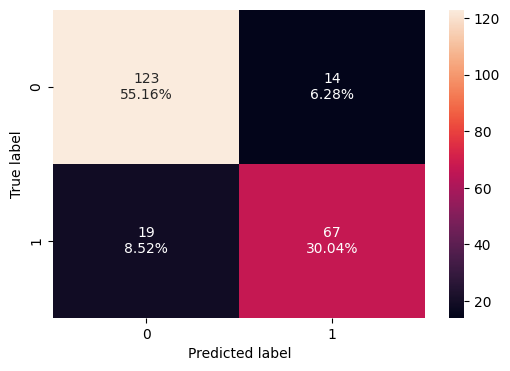

In [85]:
# Define a constant random seed for reproducibility
RANDOM_SEED = 1

# Define a refined parameter grid for RandomizedSearchCV to prevent overfitting
cat_param_grid = {
    "iterations": [25, 50, 100],  # Fewer boosting iterations
    "learning_rate": [0.01, 0.02],  # Smaller learning rates
    "depth": [2, 3, 4],  # Shallower trees
    "l2_leaf_reg": [5, 7, 9],  # Stronger regularization
    "border_count": [32, 64],  # Number of splits for numerical features
    "subsample": [0.6, 0.7, 0.8],  # Subsample ratio of the training set
    "random_strength": [1.0, 2.0],  # Moderate random strength for bagging
    "bagging_temperature": [0.5, 1.0, 1.5],  # Moderate bagging temperature
    "rsm": [0.4, 0.5, 0.6]  # Random subspace method
}

# RandomizedSearchCV
cat_randomized_cv = RandomizedSearchCV(
    estimator=CatBoostClassifier(random_state=RANDOM_SEED, verbose=0),
    param_distributions=cat_param_grid,
    scoring='roc_auc',
    n_iter=40,  # Fewer iterations to reduce computation time
    n_jobs=-1,
    cv=4,
    random_state=RANDOM_SEED
)

# Fitting parameters in RandomizedSearchCV
cat_randomized_cv.fit(X_train_over, y_train_over)

# Print best parameters and best score from RandomizedSearchCV
print("Best parameters are {} with CV score={}:".format(cat_randomized_cv.best_params_, cat_randomized_cv.best_score_))

# Get best parameters from RandomizedSearchCV
best_cat_params = cat_randomized_cv.best_params_

# Train the model with the best parameters found
opt_cat_model = CatBoostClassifier(random_state=RANDOM_SEED, verbose=0, **best_cat_params)
opt_cat_model.fit(X_train_over, y_train_over)

opt_cat_train_perf = model_performance_classification_sklearn(opt_cat_model, X_train_over, y_train_over)
opt_cat_val_perf = model_performance_classification_sklearn(opt_cat_model, X_val, y_val)

print("Optimized CatBoost Train performance:")
print(opt_cat_train_perf)
print("\nOptimized CatBoost Validation performance:")
print(opt_cat_val_perf)

confusion_matrix_sklearn(opt_cat_model, X_val, y_val)
plt.show()

* The Catboost looks amazing with the highest performance on validation score and almost no overfitting

### Tuning HGBM with oversampled data

Best parameters are {'min_samples_leaf': 5, 'max_leaf_nodes': 5, 'max_iter': 200, 'max_depth': 2, 'learning_rate': 0.007, 'l2_regularization': 0.0} with CV score=0.860079879303054:
Optimized HistGradientBoostingClassifier Train performance:
   Accuracy    Recall  Precision        F1
0  0.808252  0.781553   0.825641  0.802993

Optimized HistGradientBoostingClassifier Validation performance:
   Accuracy   Recall  Precision        F1
0  0.834081  0.77907   0.788235  0.783626


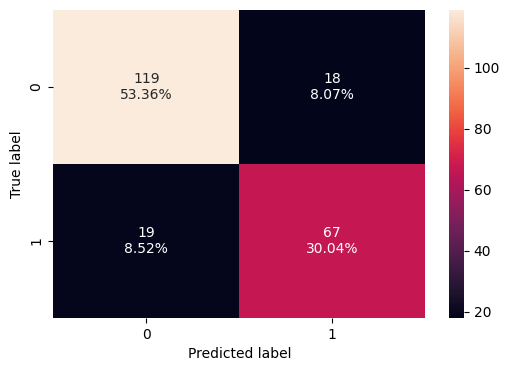

In [86]:
# Define a constant random seed for reproducibility
RANDOM_SEED = 1

# Ensure data splitting is reproducible
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# Define the parameter grid for RandomizedSearchCV
hgbm_param_grid = {
    "max_iter": [200],  
    "learning_rate": [0.005, 0.007],
    "max_leaf_nodes": [5, 10],  # Tuning the complexity of the trees
    "max_depth": [1, 2],  # Keeping depth low to reduce complexity
    "min_samples_leaf": [5, 10],  # A balance in the minimum number of samples required at a leaf node
    "l2_regularization": [0.0, 0.1, 0.2],  # Regularization term to prevent overfitting
}

# RandomizedSearchCV
hgbm_randomized_cv = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=RANDOM_SEED),
    param_distributions=hgbm_param_grid,
    scoring='roc_auc',
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=RANDOM_SEED
)

# Fitting parameters in RandomizedSearchCV
hgbm_randomized_cv.fit(X_train_over, y_train_over)

# Print best parameters and best score from RandomizedSearchCV
print("Best parameters are {} with CV score={}:".format(hgbm_randomized_cv.best_params_, hgbm_randomized_cv.best_score_))

# Get best parameters from RandomizedSearchCV
best_hgbm_params = hgbm_randomized_cv.best_params_

# Train the model with the best parameters found
ohgbm_model = HistGradientBoostingClassifier(random_state=RANDOM_SEED, **best_hgbm_params)
ohgbm_model.fit(X_train_over, y_train_over)

# Evaluate the model performance
ohgbm_train_perf = model_performance_classification_sklearn(ohgbm_model, X_train_over, y_train_over)
ohgbm_val_perf = model_performance_classification_sklearn(ohgbm_model, X_val, y_val)

print("Optimized HistGradientBoostingClassifier Train performance:")
print(ohgbm_train_perf)
print("\nOptimized HistGradientBoostingClassifier Validation performance:")
print(ohgbm_val_perf)

# Confusion matrix
confusion_matrix_sklearn(ohgbm_model, X_val, y_val)
plt.show()

* This model show good performance with the some overfitting

### Tunning SVM with different kernels on undersampled data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:
{'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__class_weight': 'balanced', 'svc__C': 0.5}
Best cross-validation accuracy:
0.8183323814962877

Training performance of the best SVM model:
   Accuracy  Recall  Precision        F1
0  0.847656  0.8125    0.87395  0.842105

Validation performance of the best SVM model:
   Accuracy    Recall  Precision        F1
0  0.820628  0.732558     0.7875  0.759036


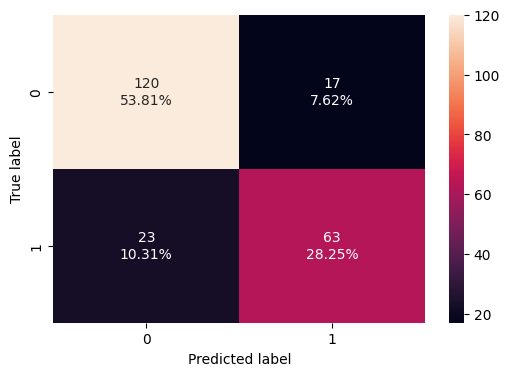

In [87]:
# Define the SVM pipeline with StandardScaler and SVC
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'svc__C': [0.5, 20, 75],             # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel types
    'svc__gamma': ['scale', 'auto'],     # Kernel coefficient
    'svc__class_weight': ['balanced']    # Class weights
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=1, verbose=1, n_jobs=-1)

# Fit RandomizedSearchCV on undersampled data
random_search.fit(X_train_un, y_train_un)

# Print the best parameters and best score
print("Best parameters found:")
print(random_search.best_params_)
print("Best cross-validation accuracy:")
print(random_search.best_score_)

# Evaluate the best model on the training set
best_svm_model = random_search.best_estimator_

svm_train_perf = model_performance_classification_sklearn(best_svm_model, X_train_un, y_train_un)
print("\nTraining performance of the best SVM model:")
print(svm_train_perf)

# Evaluate the best model on the validation set
svm_val_perf = model_performance_classification_sklearn(best_svm_model, X_val, y_val)
print("\nValidation performance of the best SVM model:")
print(svm_val_perf)

# Confusion matrix for validation set
confusion_matrix_sklearn(best_svm_model, X_val, y_val)
plt.show()

* The model is overffiting but can be useful for stacking

### Tunning Logistic regression with undersampled data

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found for undersampled data:
{'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l1', 'logisticregression__l1_ratio': 0.8333333333333334, 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 0.11288378916846889}
Best cross-validation accuracy for undersampled data:
0.8202843710583648

Training performance of the best Logistic Regression model:
   Accuracy    Recall  Precision        F1
0  0.839844  0.792969      0.875  0.831967

Validation performance of the best Logistic Regression model:
   Accuracy    Recall  Precision        F1
0  0.847534  0.767442      0.825  0.795181


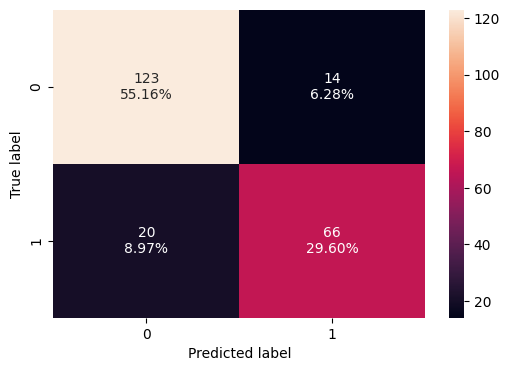

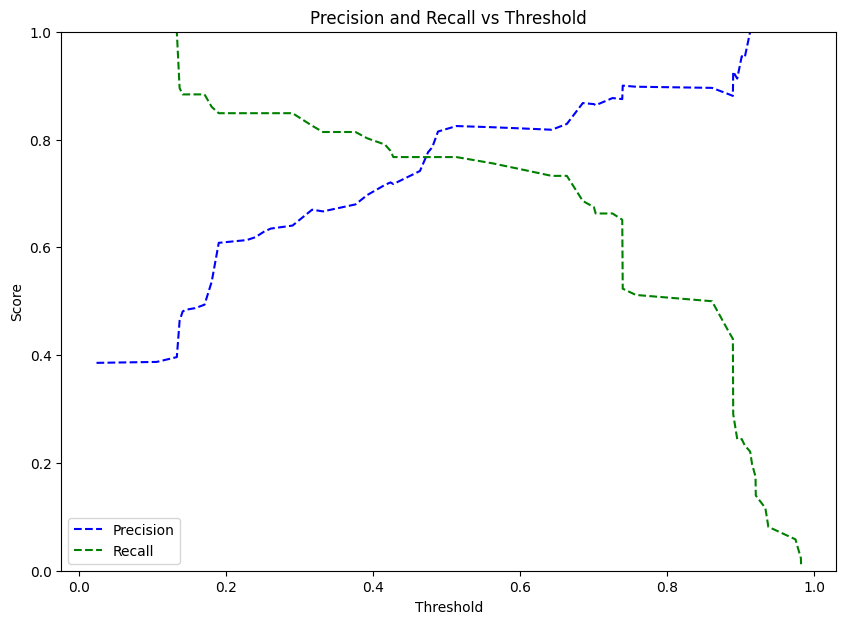

In [88]:
# Define the Logistic Regression pipeline with StandardScaler
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1)
)

# Define the parameter distributions for RandomizedSearchCV
param_dist_logreg = {
    'logisticregression__C': np.logspace(-2, 0, 20),  # Focus around 0.1
    'logisticregression__penalty': ['l1'],  # Keep l1 as it performed well
    'logisticregression__solver': ['liblinear', 'saga'],  # Include saga as an alternative
    'logisticregression__class_weight': ['balanced'],  # Keep balanced
    'logisticregression__l1_ratio': np.linspace(0.6, 0.9, 10)  # Focus around 0.75
}

# Setup RandomizedSearchCV for the logistic regression
random_search_logreg = RandomizedSearchCV(estimator=logreg_pipeline, 
                                          param_distributions=param_dist_logreg, 
                                          n_iter=30, 
                                          cv=3, 
                                          scoring='accuracy', 
                                          random_state=1, 
                                          verbose=1, 
                                          n_jobs=-1)

# Fit RandomizedSearchCV on the undersampled training data
random_search_logreg.fit(X_train_un, y_train_un)

# Print the best parameters and best score
print("Best parameters found for undersampled data:")
print(random_search_logreg.best_params_)
print("Best cross-validation accuracy for undersampled data:")
print(random_search_logreg.best_score_)

# Evaluate the best model on the training set (undersampled)
best_logreg_model_un = random_search_logreg.best_estimator_

# Evaluate the best model on the training set
logreg_train_perf = model_performance_classification_sklearn(best_logreg_model_un, X_train_un, y_train_un)
print("\nTraining performance of the best Logistic Regression model:")
print(logreg_train_perf)

# Evaluate the best model on the validation set
logreg_val_perf = model_performance_classification_sklearn(best_logreg_model_un, X_val, y_val)
print("\nValidation performance of the best Logistic Regression model:")
print(logreg_val_perf)

# Display confusion matrix for validation set
confusion_matrix_sklearn(best_logreg_model_un, X_val, y_val)
plt.show()

# Predict probabilities for the validation set
y_scores = best_logreg_model_un.predict_proba(X_val)[:, 1]

# Compute precision-recall curve
prec, rec, tre = precision_recall_curve(y_val, y_scores)

# Function to plot precision and recall against thresholds
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Precision and Recall vs Threshold")
    plt.ylim([0, 1])
    plt.show()

# Plot precision and recall against thresholds
plot_prec_recall_vs_tresh(prec, rec, tre)

* The model is overfitting a bit but shows good validation performance 

### Tuning Optuna LGBM using oversampled data

[I 2024-07-19 13:31:31,186] A new study created in memory with name: no-name-555c5229-e97b-428e-bbab-b7a333341d09
[I 2024-07-19 13:31:31,217] Trial 0 finished with value: 0.7738095238095238 and parameters: {'n_estimators': 119, 'learning_rate': 0.4123206532618726, 'subsample': 0.446398788362281, 'colsample_bytree': 0.5394633936788146, 'max_depth': 1, 'num_leaves': 11, 'min_child_samples': 5, 'reg_alpha': 0.5399484409787431, 'reg_lambda': 0.15930522616241014}. Best is trial 0 with value: 0.7738095238095238.
[I 2024-07-19 13:31:31,244] Trial 1 finished with value: 0.7513812154696132 and parameters: {'n_estimators': 136, 'learning_rate': 0.01083858126934475, 'subsample': 0.4939819704323989, 'colsample_bytree': 0.6329770563201687, 'max_depth': 1, 'num_leaves': 12, 'min_child_samples': 7, 'reg_alpha': 0.04059611610484305, 'reg_lambda': 0.11207606211860566}. Best is trial 0 with value: 0.7738095238095238.
[I 2024-07-19 13:31:31,277] Trial 2 finished with value: 0.7471264367816092 and paramet

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM

[I 2024-07-19 13:31:31,433] Trial 7 finished with value: 0.7790697674418605 and parameters: {'n_estimators': 118, 'learning_rate': 0.030012301808980443, 'subsample': 0.4085392166316497, 'colsample_bytree': 0.35636968998990504, 'max_depth': 3, 'num_leaves': 10, 'min_child_samples': 15, 'reg_alpha': 0.3503398491158687, 'reg_lambda': 0.024970737145052723}. Best is trial 5 with value: 0.7857142857142858.
[I 2024-07-19 13:31:31,464] Trial 8 finished with value: 0.7305389221556886 and parameters: {'n_estimators': 100, 'learning_rate': 0.24290950368254952, 'subsample': 0.4413714687695234, 'colsample_bytree': 0.5916028672163949, 'max_depth': 3, 'num_leaves': 10, 'min_child_samples': 8, 'reg_alpha': 0.017050539260269296, 'reg_lambda': 0.53236175947515}. Best is trial 5 with value: 0.7857142857142858.
[I 2024-07-19 13:31:31,494] Trial 9 finished with value: 0.7710843373493975 and parameters: {'n_estimators': 131, 'learning_rate': 0.036491004518573594, 'subsample': 0.31271167005720474, 'colsample

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-07-19 13:31:31,658] Trial 11 finished with value: 0.7790697674418605 and parameters: {'n_estimators': 140, 'learning_rate': 0.08915930391065521, 'subsample': 0.36434276996738896, 'colsample_bytree': 0.5330248516405154, 'max_depth': 2, 'num_leaves': 20, 'min_child_samples': 15, 'reg_alpha': 0.9591100173961384, 'reg_lambda': 0.23779230464979}. Best is trial 5 with value: 0.7857142857142858.
[I 2024-07-19 13:31:31,736] Trial 12 finished with value: 0.755813953488372 and parameters: {'n_estimators': 109, 'learning_rate': 0.17064790539935498, 'subsample': 0.3683889408861399, 'colsample_bytree': 0.46661534521222986, 'max_depth': 2, 'num_leaves': 17, 'min_child_samples': 13, 'reg_alpha': 0.1529108652040531, 'reg_lambda': 0.9592784382540207}. Best is trial 5 with value: 0.7857142857142858.
[I 2024-07-19 13:31:31,819] Trial 13 finished with value: 0.7719298245614037 and parameters: {'n_estimators': 144, 'learning_rate': 0.06327341792420275, 'subsample': 0.33706443403700315, 'colsample_b

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-07-19 13:31:31,896] Trial 14 finished with value: 0.7904191616766467 and parameters: {'n_estimators': 128, 'learning_rate': 0.05376868076535144, 'subsample': 0.3924229516802256, 'colsample_bytree': 0.5245268210934952, 'max_depth': 1, 'num_leaves': 20, 'min_child_samples': 14, 'reg_alpha': 0.07380162884058894, 'reg_lambda': 0.0550104673407329}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:31,980] Trial 15 finished with value: 0.7790697674418605 and parameters: {'n_estimators': 133, 'learning_rate': 0.04804243716932354, 'subsample': 0.3913172408793854, 'colsample_bytree': 0.30439567569750847, 'max_depth': 2, 'num_leaves': 20, 'min_child_samples': 13, 'reg_alpha': 0.05206849445826922, 'reg_lambda': 0.05266062772862632}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,058] Trial 16 finished with value: 0.7613636363636365 and parameters: {'n_estimators': 138, 'learning_rate': 0.01755141104514619, 'subsample': 0.47848007130736014, 'cols

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

[I 2024-07-19 13:31:32,146] Trial 17 finished with value: 0.7719298245614037 and parameters: {'n_estimators': 127, 'learning_rate': 0.02186679555956455, 'subsample': 0.3892290084149792, 'colsample_bytree': 0.50656719916804, 'max_depth': 3, 'num_leaves': 19, 'min_child_samples': 14, 'reg_alpha': 0.011819786349763361, 'reg_lambda': 0.06494210210545255}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,219] Trial 18 finished with value: 0.7857142857142858 and parameters: {'n_estimators': 111, 'learning_rate': 0.048583199076281815, 'subsample': 0.4693566196550619, 'colsample_bytree': 0.5918829696983563, 'max_depth': 1, 'num_leaves': 17, 'min_child_samples': 11, 'reg_alpha': 0.09240538757372135, 'reg_lambda': 0.1917150092686578}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,299] Trial 19 finished with value: 0.7380952380952381 and parameters: {'n_estimators': 145, 'learning_rate': 0.1245687339216898, 'subsample': 0.34027272418457655, 'colsam

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-07-19 13:31:32,382] Trial 20 finished with value: 0.787878787878788 and parameters: {'n_estimators': 122, 'learning_rate': 0.06349287264435294, 'subsample': 0.4092867661555425, 'colsample_bytree': 0.41587657578449294, 'max_depth': 1, 'num_leaves': 18, 'min_child_samples': 11, 'reg_alpha': 0.12161479665415155, 'reg_lambda': 0.04308439927774971}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,459] Trial 21 finished with value: 0.787878787878788 and parameters: {'n_estimators': 123, 'learning_rate': 0.06421331939664834, 'subsample': 0.4116604350675855, 'colsample_bytree': 0.41406823909310314, 'max_depth': 1, 'num_leaves': 19, 'min_child_samples': 11, 'reg_alpha': 0.12872672598897103, 'reg_lambda': 0.03907466822635667}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,536] Trial 22 finished with value: 0.7904191616766467 and parameters: {'n_estimators': 122, 'learning_rate': 0.06303588003001295, 'subsample': 0.37869112201147376, 'cols

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

[I 2024-07-19 13:31:32,616] Trial 23 finished with value: 0.7719298245614037 and parameters: {'n_estimators': 113, 'learning_rate': 0.15702965117052237, 'subsample': 0.3737709478389865, 'colsample_bytree': 0.3934308115018533, 'max_depth': 1, 'num_leaves': 17, 'min_child_samples': 9, 'reg_alpha': 0.08362834679684716, 'reg_lambda': 0.01779608098551261}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,695] Trial 24 finished with value: 0.7784431137724551 and parameters: {'n_estimators': 120, 'learning_rate': 0.050001652955804235, 'subsample': 0.3825062780476391, 'colsample_bytree': 0.45777990569558663, 'max_depth': 1, 'num_leaves': 18, 'min_child_samples': 10, 'reg_alpha': 0.20487151114346946, 'reg_lambda': 0.0480263114097067}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,779] Trial 25 finished with value: 0.7692307692307692 and parameters: {'n_estimators': 104, 'learning_rate': 0.07540468857259802, 'subsample': 0.34583557964441236, 'cols

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead 

[I 2024-07-19 13:31:32,861] Trial 26 finished with value: 0.7613636363636365 and parameters: {'n_estimators': 127, 'learning_rate': 0.02238512516418545, 'subsample': 0.42377464292196154, 'colsample_bytree': 0.4842212470586371, 'max_depth': 1, 'num_leaves': 16, 'min_child_samples': 10, 'reg_alpha': 0.1185686280276007, 'reg_lambda': 0.07059670883238678}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:32,938] Trial 27 finished with value: 0.7719298245614037 and parameters: {'n_estimators': 117, 'learning_rate': 0.1449411299502629, 'subsample': 0.39503494708491704, 'colsample_bytree': 0.398747321241411, 'max_depth': 1, 'num_leaves': 19, 'min_child_samples': 12, 'reg_alpha': 0.22925797025864902, 'reg_lambda': 0.018374359319746472}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:33,025] Trial 28 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 125, 'learning_rate': 0.043857701136331265, 'subsample': 0.353333855282975, 'colsa

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead 

[I 2024-07-19 13:31:33,108] Trial 29 finished with value: 0.7904191616766467 and parameters: {'n_estimators': 120, 'learning_rate': 0.06862050897220134, 'subsample': 0.45402101718241833, 'colsample_bytree': 0.5563001049023524, 'max_depth': 1, 'num_leaves': 15, 'min_child_samples': 8, 'reg_alpha': 0.030440069934574137, 'reg_lambda': 0.1526156342920702}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:33,184] Trial 30 finished with value: 0.7692307692307692 and parameters: {'n_estimators': 109, 'learning_rate': 0.28754444275879143, 'subsample': 0.45586671155180575, 'colsample_bytree': 0.5595849191581006, 'max_depth': 1, 'num_leaves': 14, 'min_child_samples': 6, 'reg_alpha': 0.025078406294072986, 'reg_lambda': 0.12947821504529117}. Best is trial 14 with value: 0.7904191616766467.
[I 2024-07-19 13:31:33,261] Trial 31 finished with value: 0.7904191616766467 and parameters: {'n_estimators': 122, 'learning_rate': 0.06967629443642852, 'subsample': 0.42852747352663034, 'col

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightG

[I 2024-07-19 13:31:33,343] Trial 32 finished with value: 0.7976190476190477 and parameters: {'n_estimators': 119, 'learning_rate': 0.07419625873907919, 'subsample': 0.4265109814727789, 'colsample_bytree': 0.6248060499474775, 'max_depth': 1, 'num_leaves': 15, 'min_child_samples': 8, 'reg_alpha': 0.03607183424274094, 'reg_lambda': 0.1591464103592363}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:33,421] Trial 33 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 116, 'learning_rate': 0.10852421987743564, 'subsample': 0.456888075833604, 'colsample_bytree': 0.6436721122611933, 'max_depth': 1, 'num_leaves': 14, 'min_child_samples': 7, 'reg_alpha': 0.047664824926670846, 'reg_lambda': 0.20471392461262636}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:33,504] Trial 34 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 119, 'learning_rate': 0.08509853076046558, 'subsample': 0.45912196501465863, 'colsamp

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

[I 2024-07-19 13:31:33,584] Trial 35 finished with value: 0.7857142857142858 and parameters: {'n_estimators': 129, 'learning_rate': 0.03811937441332967, 'subsample': 0.48204136897714317, 'colsample_bytree': 0.5589282352113394, 'max_depth': 1, 'num_leaves': 12, 'min_child_samples': 6, 'reg_alpha': 0.027442599792215954, 'reg_lambda': 0.07674171394833561}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:33,660] Trial 36 finished with value: 0.7613636363636365 and parameters: {'n_estimators': 114, 'learning_rate': 0.027085840807411214, 'subsample': 0.49596905427987237, 'colsample_bytree': 0.6201909845466552, 'max_depth': 1, 'num_leaves': 15, 'min_child_samples': 9, 'reg_alpha': 0.01924411180518221, 'reg_lambda': 0.11218366236632787}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:33,740] Trial 37 finished with value: 0.7904191616766467 and parameters: {'n_estimators': 124, 'learning_rate': 0.05698278538724328, 'subsample': 0.43026078503127335, 'co

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

[I 2024-07-19 13:31:33,824] Trial 38 finished with value: 0.7719298245614037 and parameters: {'n_estimators': 134, 'learning_rate': 0.11986899752912666, 'subsample': 0.37996258465433197, 'colsample_bytree': 0.5357732928658803, 'max_depth': 1, 'num_leaves': 13, 'min_child_samples': 7, 'reg_alpha': 0.039076229782812714, 'reg_lambda': 0.058440105284437875}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:33,901] Trial 39 finished with value: 0.7719298245614037 and parameters: {'n_estimators': 120, 'learning_rate': 0.18873401939845555, 'subsample': 0.4463030617278407, 'colsample_bytree': 0.5727428587257373, 'max_depth': 1, 'num_leaves': 15, 'min_child_samples': 8, 'reg_alpha': 0.029970000662613593, 'reg_lambda': 0.02787511603847229}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:33,979] Trial 40 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 127, 'learning_rate': 0.07881551562307171, 'subsample': 0.41770803701264325, 'co

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

[I 2024-07-19 13:31:34,059] Trial 41 finished with value: 0.7904191616766467 and parameters: {'n_estimators': 119, 'learning_rate': 0.07169252636336453, 'subsample': 0.4352257271942335, 'colsample_bytree': 0.4830564877728585, 'max_depth': 1, 'num_leaves': 16, 'min_child_samples': 8, 'reg_alpha': 0.036112588322674194, 'reg_lambda': 0.13382677422841108}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:34,143] Trial 42 finished with value: 0.783132530120482 and parameters: {'n_estimators': 122, 'learning_rate': 0.057604853774537966, 'subsample': 0.4210501085526671, 'colsample_bytree': 0.4992083353426867, 'max_depth': 1, 'num_leaves': 17, 'min_child_samples': 9, 'reg_alpha': 0.06561924602152847, 'reg_lambda': 0.1444982800385999}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:34,223] Trial 43 finished with value: 0.7857142857142858 and parameters: {'n_estimators': 131, 'learning_rate': 0.03928398519901065, 'subsample': 0.4007822698964, 'colsample_

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightG

[I 2024-07-19 13:31:34,310] Trial 44 finished with value: 0.7513812154696132 and parameters: {'n_estimators': 122, 'learning_rate': 0.010764240392270072, 'subsample': 0.42769090393777937, 'colsample_bytree': 0.5421472179654654, 'max_depth': 1, 'num_leaves': 16, 'min_child_samples': 10, 'reg_alpha': 0.016019492020803758, 'reg_lambda': 0.16836042945225516}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:34,390] Trial 45 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 125, 'learning_rate': 0.10405395749731934, 'subsample': 0.4500152308124683, 'colsample_bytree': 0.5592810334037722, 'max_depth': 1, 'num_leaves': 14, 'min_child_samples': 10, 'reg_alpha': 0.34059203118878123, 'reg_lambda': 0.11400279898084315}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:34,473] Trial 46 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 129, 'learning_rate': 0.09019916743239316, 'subsample': 0.4019513721757555, 'co

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightG

[I 2024-07-19 13:31:34,564] Trial 47 finished with value: 0.7928994082840237 and parameters: {'n_estimators': 116, 'learning_rate': 0.02968212916576352, 'subsample': 0.44086562095013143, 'colsample_bytree': 0.4972552144847082, 'max_depth': 2, 'num_leaves': 12, 'min_child_samples': 9, 'reg_alpha': 0.023848190684313115, 'reg_lambda': 0.2182305700101425}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:34,651] Trial 48 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 112, 'learning_rate': 0.026143726502915066, 'subsample': 0.4413480409659305, 'colsample_bytree': 0.6064961894375419, 'max_depth': 3, 'num_leaves': 11, 'min_child_samples': 9, 'reg_alpha': 0.022736071775331032, 'reg_lambda': 0.24403584309200285}. Best is trial 32 with value: 0.7976190476190477.
[I 2024-07-19 13:31:34,737] Trial 49 finished with value: 0.7836257309941521 and parameters: {'n_estimators': 107, 'learning_rate': 0.013607443577835499, 'subsample': 0.46865463495245296, 'co

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

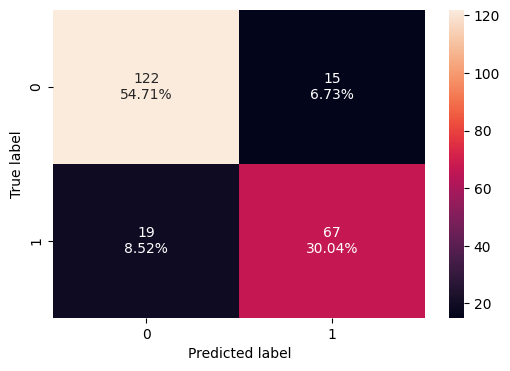

In [89]:
# Define a constant random seed for reproducibility
RANDOM_SEED = 42

# Define objective function for Optuna
def lgbm_objective(trial):
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_uniform('subsample', 0.3, 0.5),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.3, 0.7),
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'num_leaves': trial.suggest_int('num_leaves', 10, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 15),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.01, 1)
    }
    lgbm_model = lgb.LGBMClassifier(random_state=RANDOM_SEED, **lgbm_params)
    lgbm_model.fit(X_train_over, y_train_over)
    y_pred = lgbm_model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# Run Optuna optimization with a fixed random seed
lgbm_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
lgbm_study.optimize(lgbm_objective, n_trials=50)

# Get the best parameters
best_lgbm_params = lgbm_study.best_params
print("Best LGBM parameters:", best_lgbm_params)

# Train the model with the best parameters found
optimized_lgbm_model = lgb.LGBMClassifier(random_state=RANDOM_SEED, **best_lgbm_params)
optimized_lgbm_model.fit(X_train_over, y_train_over)

# Evaluate performance on train and validation sets
optimized_lgbm_train_perf = model_performance_classification_sklearn(optimized_lgbm_model, X_train_over, y_train_over)
optimized_lgbm_val_perf = model_performance_classification_sklearn(optimized_lgbm_model, X_val, y_val)

print("Optimized LGBM Train performance:")
print(optimized_lgbm_train_perf)
print("\nOptimized LGBM Validation performance:")
print(optimized_lgbm_val_perf)

# Confusion matrix for validation set
confusion_matrix_sklearn(optimized_lgbm_model, X_val, y_val)
plt.show()

* Very good performance from the LGBM as the train and validation score is amlmost the same

## Stacking Model

Stacking Classifier score: 0.8278443113772455


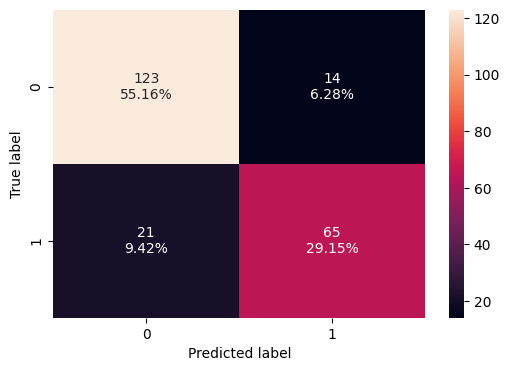

In [90]:
# Define the base estimators for stacking
estimators = [
    ('Catboost', opt_cat_model),
    ('GBM', over_tuned_gbm),
    ('Random Forest', over_tuned_rf),
    ('HGBM', ohgbm_model),
    ('XGboost', over_tuned_xgboost),
    #('GBM (Optuna)', optuna_ogbm),
    #('XGBoost (Optuna)', optuna_xgb_model),
    #('R Forest', under_tuned_rf),
    #('SVM_U', best_svm_model),
    #('LGR', random_search_logreg),
    #('NN', over_tuned_nn),
    #('LightGBM (Optuna)', optimized_lgbm_model)
]

final_estimator = opt_cat_model

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1
)

# Fit the stacking classifier on the full training data
stacking_classifier.fit(X_train, y_train)

# Print the final model performance (optional)
print(f"Stacking Classifier score: {stacking_classifier.score(X_train, y_train)}")

# Confusion matrix for validation set
confusion_matrix_sklearn(stacking_classifier, X_val, y_val)
plt.show()

In [91]:
s_c_train = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
s_c_train

,Accuracy,Recall,Precision,F1
0,0.827844,0.726562,0.805195,0.76386


In [92]:
s_c_val = model_performance_classification_sklearn(stacking_classifier, X_val, y_val)
s_c_val

,Accuracy,Recall,Precision,F1
0,0.843049,0.755814,0.822785,0.787879


* The model shows high validation score

In [93]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        onn_train_perf.T,
        oxgb_train_perf.T,
        uxgb_train_perf.T,
        optuna_xgb_train_perf.T,
        orf_train_perf.T,
        urf_train_perf.T,
        opt_rf_train_perf.T,
        ogbm_train_perf.T,
        opt_ogbm_train_perf.T,
        s_c_train.T,
        optimized_lgbm_train_perf.T,
        ohgbm_train_perf.T,
        opt_cat_train_perf.T,
        logreg_train_perf.T,
        svm_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "NN Oversampled",
    "XGB Oversampled",
    "XGB Undersampled",
    "XGB Optuna",
    "Rforest Oversampled",
    "Rforest Undersampled",
    "Rforest Optuna",
    "GBM Oversampled",
    "GBM Optuna",
    "Stacked",
    "LGBM Optuna",
    "HGBM Oversampled",
    "Catboost Oversampled",
    "LogReg Undersampled",
    "SVM Undersampled",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,NN Oversampled,XGB Oversampled,XGB Undersampled,XGB Optuna,Rforest Oversampled,Rforest Undersampled,Rforest Optuna,GBM Oversampled,GBM Optuna,Stacked,LGBM Optuna,HGBM Oversampled,Catboost Oversampled,LogReg Undersampled,SVM Undersampled
Accuracy,0.821602,0.827670,0.820388,0.810680,0.842233,0.825243,0.810680,0.821602,0.814320,0.827844,0.810680,0.808252,0.817961,0.839844,0.847656
Recall,0.788835,0.800971,0.803398,0.752427,0.832524,0.813107,0.776699,0.803398,0.776699,0.726562,0.754854,0.781553,0.762136,0.792969,0.812500
Precision,0.844156,0.846154,0.831658,0.851648,0.849010,0.833333,0.833333,0.833753,0.839895,0.805195,0.849727,0.825641,0.857923,0.875000,0.873950
F1,0.815558,0.822943,0.817284,0.798969,0.840686,0.823096,0.804020,0.818294,0.807062,0.763860,0.799486,0.802993,0.807198,0.831967,0.842105


In [94]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        onn_val_perf.T,
        oxgb_val_perf.T,
        uxgb_val_perf.T,
        optuna_xgb_val_perf.T,
        orf_val_perf.T,
        urf_val_perf.T,
        opt_rf_val_perf.T,
        ogbm_val_perf.T,
        opt_ogbm_val_perf.T,
        s_c_val.T,
        optimized_lgbm_val_perf.T,
        ohgbm_val_perf.T,
        opt_cat_val_perf.T,
        logreg_val_perf.T,
        svm_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "NN Oversampled",
    "XGB Oversampled",
    "XGB Undersampled",
    "XGB Optuna",
    "Rforest Oversampled",
    "Rforest Undersampled",
    "Rforest Optuna",
    "GBM Oversampled",
    "GBM Optuna",
    "Stacked",
    "LGBM Optuna",
    "HGBM Oversampled",
    "Catboost Oversampled",
    "LogReg Undersampled",
    "SVM Undersampled",
    
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,NN Oversampled,XGB Oversampled,XGB Undersampled,XGB Optuna,Rforest Oversampled,Rforest Undersampled,Rforest Optuna,GBM Oversampled,GBM Optuna,Stacked,LGBM Optuna,HGBM Oversampled,Catboost Oversampled,LogReg Undersampled,SVM Undersampled
Accuracy,0.825112,0.838565,0.834081,0.847534,0.829596,0.834081,0.847534,0.834081,0.843049,0.843049,0.847534,0.834081,0.852018,0.847534,0.820628
Recall,0.732558,0.790698,0.779070,0.779070,0.779070,0.779070,0.779070,0.779070,0.779070,0.755814,0.779070,0.779070,0.779070,0.767442,0.732558
Precision,0.797468,0.790698,0.788235,0.817073,0.779070,0.788235,0.817073,0.788235,0.807229,0.822785,0.817073,0.788235,0.827160,0.825000,0.787500
F1,0.763636,0.790698,0.783626,0.797619,0.779070,0.783626,0.797619,0.783626,0.792899,0.787879,0.797619,0.783626,0.802395,0.795181,0.759036


* The best models are: Catboost, XGB Optuna and Rforest Optuna with oversampled data that showed strong performance on both the training and validation sets, which is a good sign of generalization with best balance between training and validation performance, which might make it a more robust choice for unseen data
* The Stacked Model also shows iteresting performance

## Making predictions

In [95]:
# Make predictions
predictions = stacking_classifier.predict(X_test)

# Ensure PassengerId is an integer
df_test['PassengerId'] = df_test['PassengerId'].astype(int)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Convert Survived to integers
submission['Survived'] = submission['Survived'].astype(int)

# Display the first 5 rows of the submission file
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [96]:
# Save the DataFrame as a CSV file
submission.to_csv('submission.csv', index=False)